# 📚 Exercise Session - Week 1

Welcome to Week 1 exercise session of **CS-552: Modern NLP**!

> **What will be covered:**
> 1. [**TASK A:** Training a word embedding model](#1)
> 2. [**TASK B:** Word embedding similarity](#2)
> 3. [**TASK C:** Sentiment analysis of movie reviews](#3)

> **By the end of the session you will be able to:**
> - ✅  train from scratch a word embedding model
> - ✅  load and use pre-trained word embeddings 
> - ✅  perform word embedding analogies and understand their implicit biases
> - ✅  train and evaluate a sentiment classifier using word embeddings 

## Intro - Word embedding models

#### 🔵 What?
A word embedding is a learned representation for text where words that have the same meaning have a similar representation. It is this approach to representing words and documents that may be considered one of the key breakthroughs of deep learning on challenging natural language processing problems.


#### 🟡 How?
There are different versions of word embeddings depending on the way the embeddings are learned.
- Some of the models learn a focus word given the neighboring words that surround them
- Some other models learn the neighboring words given the focus word.
- Some other word embedding models try to derive the relationship between the words from global statistics of the words in the overall corpus.


#### 🟣 Why?
Word embedding in NLP is an important concept that is used for representing words for text analysis in the form of real-valued vectors. It is an advancement in NLP that has improved the ability of computers to understand text-based content in a better way. 


#### A little bit of history on word embeddings
In 2013, Tomas Mikolov et al. developed an algorithm for learning word embeddings called **Word2vec** [[paper](https://arxiv.org/abs/1301.3781)][[code](https://code.google.com/archive/p/word2vec/)]. This algorithm uses a shallow neural network to learn word vectors so that the representation of each word of a given corpus is good at predicting its own contexts (Skip-Gram) or vice versa (CBOW).

One year after the publication of Word2vec, Pennington et al. developed a new algorithm for learning word embeddings called **GloVe** [[paper](https://nlp.stanford.edu/pubs/glove.pdf)][[code](https://github.com/stanfordnlp/GloVe)]. This algorithm is based on the observation that word relationships can be recovered from the co-occurrence statistics of any (large enough) corpus.

<div style="padding:8px 0 8px 15px;border-left:3px solid orange;background-color:#F3F3F3;">
    <h3>Goal of today's exercise</h3><br/>
In this exercise session, we will use both variants of these word embedding models (Word2Vec and GloVe) for our experiments.
For the first part, we will train from scratch a Word2vec model with different datasets. In the second part, we will load pre-trained Word2vec and GloVe embeddings and test them on how well they capture concept similarity among words. Finally, for the last part, we will train a simple sentiment analysis classifier with these pre-trained embeddings as we discussed in the lecture.

You will need to fill in all the missing pieces of code. For each one, you will be given a 🎯 `Goal` guidance that explains the steps you need to implement and a 💻 `API` reference with the functions or classes you can use to achieve each goal.

#### Setup
Please check the [setup guide]() of the course before you start.

</div>

In [1]:
#!conda create -n "modern_nlp" python=3.10

In [2]:
#!pip3 install pandas gensim numpy matplotlib seaborn scikit-learn tqdm torch torchmetrics

In [3]:
# imported libraries for this exercise
import pandas as pd
import numpy as np
from gensim.test.utils import common_texts
from gensim.utils import tokenize   
from gensim.models import Word2Vec
import gensim.downloader
import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchmetrics.classification import BinaryAccuracy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

/opt/homebrew/Caskroom/miniforge/base/envs/modern_nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<a id="1"></a>
## 1. TASK A: Training a word embedding model from stratch 

In this part, you will train a model to learn vector representations of words and more specifically, we will train the word2vec model. 
To train the model we will use the Gensim library which is a free open-source Python library for representing documents as semantic vectors.
 
> **Gensim** is designed to process raw, unstructured digital texts (“plain text”) using unsupervised machine learning algorithms. The algorithms in Gensim, such as Word2Vec, FastText, Latent Semantic Indexing (LSI, LSA, LsiModel), Latent Dirichlet Allocation (LDA, LdaModel) etc, automatically discover the semantic structure of documents by examining statistical co-occurrence patterns within a corpus of training documents. These algorithms are unsupervised, which means no human input is necessary – you only need a corpus of plain text documents.
>
> You can discover all Gensim functionalities [here](https://radimrehurek.com/gensim/index.html).

To train your embedding model, you will need to instantiate Word2Vec and pass the data to the model to train with. We essentially need to pass on a list of lists, where each list within the main list contains a set of tokens from a user review. Word2Vec uses all these tokens to internally create a vocabulary.

**Data:** We will train our embedding model using a toy dataset that is provided by the Gensim library. You can use the dataset under the following path `gensim.test.utils.common_texts`. 

In [4]:
# bag of words for each sentence in toy dataset (imported from the gensim library in cell 2)
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

#### Train a Gensim Word2Vec model

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">
    
- 🎯 **Goal:** Train with `common_texts` dataset a Gensim word2vec model.<br>

- 💻  **API:** You can use `gensim.models.Word2Vec` class.
</div>

In [5]:
# instantiate and train model
# window: The maximum distance between the current and predicted word within a sentence. Essentially, this defines the context size.
# vector_size: The dimensionality of the feature vectors.
# min_count: Ignores all words with total frequency lower than this.
# workers: Use these many worker threads to train the model (=faster training with multicore machines).

w2v_model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1)
w2v_model

In [6]:
# dict with vocabulary frequencies
words = w2v_model.wv.key_to_index
words

{'system': 0,
 'graph': 1,
 'trees': 2,
 'user': 3,
 'minors': 4,
 'eps': 5,
 'time': 6,
 'response': 7,
 'survey': 8,
 'computer': 9,
 'interface': 10,
 'human': 11}

#### Find word similarities

In [7]:
# explore embeddings
vector = w2v_model.wv['computer']  # get numpy vector of a word
print('The vector length of the word is {}.'.format(len(vector)))
vector

The vector length of the word is 100.


array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428459,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.0044876 ,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811905, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Use the trained word2vec model to find most similar words for token _"computer"_.
- 💻 **API:** You can use Gensim's `.most_similar` function.

</div>

In [8]:
# print most similar words
similar = w2v_model.wv.most_similar('computer', topn=15)
similar

[('system', 0.21617141366004944),
 ('survey', 0.04468922317028046),
 ('interface', 0.015203384682536125),
 ('time', 0.0019510771380737424),
 ('trees', -0.03284314274787903),
 ('human', -0.07424270361661911),
 ('response', -0.09317589551210403),
 ('graph', -0.09575342386960983),
 ('eps', -0.10513808578252792),
 ('user', -0.16911624372005463),
 ('minors', -0.17323409020900726)]

<div style="padding:8px 0 8px 15px;border-left:3px solid gray;background-color:#F3F3F3;">

#### Play around with inital settings

- Re-train the model with different datasets ( [Wikipedia](https://radimrehurek.com/gensim/corpora/wikicorpus.html), [Opinosis](https://radimrehurek.com/gensim/corpora/opinosiscorpus.html) ) and vector sizes and run similarity with different top-n. How would you comment on the results?
- Think about the limitations of the Word2vec approach.

</div>

***--- YOU CAN WRITE YOU ANSWER HERE ---***

---

In [ ]:
# Retrain the model with different dataset (Wikipedia) and vector sizes and run similarity with different top-n
vector_sizes = [50, 100, 200]  # Different vector sizes to experiment with
top_n_values = [5, 10, 15]  # Different top-n values for similarity queries
for vector_size in vector_sizes:
    for top_n in top_n_values:
        w2v_model = gensim.downloader.load('glove-wiki-gigaword-{}'.format(vector_size))
        similar = w2v_model.most_similar('computer', topn=top_n)
        print('Vector size: {} | Top-n: {} | Similar words: {}'.format(vector_size, top_n, similar))

Vector size: 50 | Top-n: 5 | Similar words: [('computers', 0.916504442691803), ('software', 0.8814992904663086), ('technology', 0.852556049823761), ('electronic', 0.812586784362793), ('internet', 0.8060455322265625)]


Vector size: 50 | Top-n: 10 | Similar words: [('computers', 0.916504442691803), ('software', 0.8814992904663086), ('technology', 0.852556049823761), ('electronic', 0.812586784362793), ('internet', 0.8060455322265625), ('computing', 0.8026036620140076), ('devices', 0.8016184568405151), ('digital', 0.7991793751716614), ('applications', 0.7912740707397461), ('pc', 0.7883159518241882)]
Vector size: 50 | Top-n: 15 | Similar words: [('computers', 0.916504442691803), ('software', 0.8814992904663086), ('technology', 0.852556049823761), ('electronic', 0.812586784362793), ('internet', 0.8060455322265625), ('computing', 0.8026036620140076), ('devices', 0.8016184568405151), ('digital', 0.7991793751716614), ('applications', 0.7912740707397461), ('pc', 0.7883159518241882), ('hardware', 0.78669673204422), ('systems', 0.7800467014312744), ('web', 0.7793424725532532), ('laptop', 0.7741158604621887), ('desktop', 0.7662739753723145)]


<a id="2"></a>
## 2. TASK B: Word embedding similarity

For this task, we will use pre-trained word embedding models. 

**Word2Vec:** We will use once again Word2vec as in the previous question, but in this case we will load the pre-trained version of it that has been trained on a part of the Google News dataset (about 100 billion words). The model variant that we will use, contains 300-dimensional vectors for 3 million words and phrases.

**GloVe:** We will also use GloVe word embeddings that have been pre-trained on 2B tweets, 27B tokens, 1.2M vocab, uncased. The model variant that we will use contains 100-dimensional vectors.

Once we load the vector represenation of words, we will:
- find similarities between group of words.
- discover a very cool property of word embeddings through analogies.
- evaluate their performance on how well they capture the semantics between words on the SimLex task.


### 2.1 Using pre-trained word embedding models

In [10]:
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [11]:
# Download the "word2vec-google-news-300" embeddings
w2v_vectors = gensim.downloader.load('word2vec-google-news-300')

In [12]:
# Download the "glove-wiki-gigaword-100" embeddings
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

The best way to understand a data is by visualizing them. We will use t-SNE to reduce the data with 300 dimensions to 2 dimensions, so that we can plot the data on our screens.
t-SNE is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.

In [13]:
# visualization utility function. NO NEED TO CHANGE ANYTHING HERE
sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

def tsne_scatterplot(model, search_word, topn):
    labels = [search_word]
    tokens = [model[search_word]]
    similar = [1]
    close_words = model.similar_by_word(search_word, topn=topn)
    for word in close_words:
        tokens.append(model[word[0]])
        labels.append(word[0])
        similar.append(word[1])

    tsne_model = TSNE(n_components=2, perplexity=topn, init='pca')
    coordinates = tsne_model.fit_transform(np.array(tokens))
    df = pd.DataFrame({'x': [x for x in coordinates[:, 0]],
                       'y': [y for y in coordinates[:, 1]],
                       'words': labels,
                       'similarity': similar}
                      )
    fig, ax = plt.subplots()
    plot = ax.scatter(df.x, df.y, c=df.similarity, cmap='Reds')
    for i in range(len(df)):
        ax.annotate("  {} ({:.2f})".format(df.words[i].title(),
                                           df.similarity[i]),
                    (df.x[i], df.y[i]))

    plt.colorbar(mappable=plot, ax=ax)
    plt.title('t-SNE visualization for {}'.format(search_word))
    plt.show()

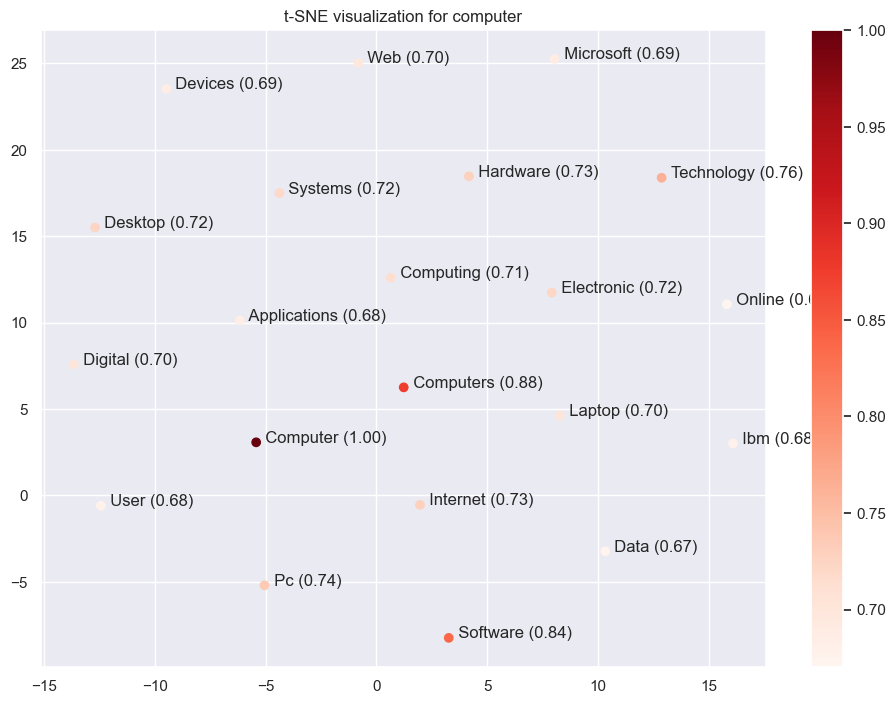

In [14]:
# visualize the most similar words for a given word.
tsne_scatterplot(glove_vectors, "computer", 20)

#### Interactive visualization

In the following link, you can explore the state-of-the-art models in an interactive embedding visualization: https://projector.tensorflow.org/.

Using the TensorBoard Embedding Projector, you can graphically represent high dimensional embeddings. This can be helpful in visualizing, examining, and understanding your embeddings.

Give it a try! Test interesting clusters of similar words! 

### 2.2 Check word analogies

The fact that we can analyze the use of words in language to deduce their meaning is a fundamental idea of [distributional semantics](https://en.wikipedia.org/wiki/Distributional_semantics). This is the inspiration behind many algorithms for learning numerical representations of words (word embeddings). An important aspect of these representations is the ability to solve word analogies of the form “A is to B what C is to X” using simple arithmetic. This is generally simplified as “King — Man + Woman $\sim$ Queen.

In this subquestion we will explore interesting relations that can be extracted from word embeddings. You will be given semantic relations and you need to implement the respective code using the embedding model.

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Use the pre-trained GloVe embeddings to implement the following analogies.
- 💻 **API:** You can use Gensim's `.most_similar` function.

</div>

**Analogy A:**  `King` — `Man` + `Woman` ~ `?`

`?`: `Queen`

In [15]:
# Check the "most similar words", using the default "cosine similarity" measure. 

print(glove_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
# w2v_vectors
print(w2v_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))

[('queen', 0.7698541283607483)]


[('queen', 0.7118192911148071)]


**Analogy B:**  `France` — `Paris` + `Athens` ~ `?`

`?`: `Greece`

In [16]:
# Check the "most similar words", using the default "cosine similarity" measure. 

# glove_vectors
#print(glove_vectors.most_similar(positive=['France', 'Athens'], negative=['Paris'], topn=1))
# w2v_vectors
print(w2v_vectors.most_similar(positive=['France', 'Athens'], negative=['Paris'], topn=1))

[('Greece', 0.6378624439239502)]


However, we should not forget that these models are trained in human generated language. Meaning that sociatital and demographic biases are inevitable. In the following example you will unfortunatelly witness these kind of biases that the model unitentionally proragates to its final output.

Fortunately, extensive reaserch has been developed the last years to tackle this issue trying to de-bias the embeddings models. More regarding this topic will be covered in Week 11  when we will be talking about Ethics in NLP regarding Toxicity, Bias and Fairness.

**Analogy C:**  `Doctor` - `Man` + `Woman` ~ `Nurse`

In [17]:
# Check the "most similar words", using the default "cosine similarity" measure. 
# glove_vectors
print(glove_vectors.most_similar(positive=['doctor', 'woman'], negative=['man'], topn=1))
# w2v_vectors
print(w2v_vectors.most_similar(positive=['doctor', 'woman'], negative=['man'], topn=1))

[('nurse', 0.7735227942466736)]
[('gynecologist', 0.7093892097473145)]


### 2.3 Evaluate different models with SimLex

In this part of the exercise, we will evaluate the syntactic concreteness of the created vectors using their similarity. For this task, we will use the SimLex999 dataset which is a human-annotated dataset regarding the similarity of concepts of words.

- 📄 Paper: https://aclanthology.org/J15-4004.pdf
- 👾 More about the task: https://fh295.github.io/simlex.html

> - Download the data from [here](https://fh295.github.io/SimLex-999.zip)
> - Unzip the file and put the corresponding folder with the dataset in the same dir as this notebook

SimLex-999 is a gold standard resource for the evaluation of models that learn the meaning of words and concepts. SimLex-999 provides a way of measuring how well models capture similarity, rather than relatedness or association.

#### Dataset:
SimLex-999.txt is a tab-separated plaintext file, where rows correspond to concept pairs and columns correspond to the properties of each pair.

|Column | Description |
|-------|:-------------|
|word1| The first concept in the pair.|
|word2| The second concept in the pair. Note that the order is only relevant to the column Assoc(USF). These values (free association scores) are asymmetric. All other values are symmetric properties independent of the ordering word1, word2.|
|POS| The majority part-of-speech of the concept words, as determined by occurrence in the POS-tagged British National Corpus. Only pairs of matching POS are included in SimLex-999.|
|SimLex999 | The SimLex999 similarity rating. Note that average annotator scores have been (linearly) mapped from the range [0,6] to the range [0,10] to match other datasets such as WordSim-353. |
|conc(w1)| The concreteness rating of word1 on a scale of 1-7. Taken from the University of South Florida Free Association Norms database. |
|conc(w2)| The concreteness rating of word2 on a scale of 1-7. Taken from the University of South Florida Free Association Norms database.|
|concQ| The quartile the pair occupies based on the two concreteness ratings. Used for some analyses in the above paper.|
|Assoc(USF)| The strength of free association from word1 to word2. Values are taken from the University of South Florida Free Association Dataset.|
|SimAssoc333| Binary indicator of whether the pair is one of the 333 most associated in the dataset (according to Assoc(USF)). This subset of SimLex999 is often the hardest for computational models to capture because the noise from high association can confound the similarity rating. See the paper for more details.|
|SD(SimLex)| The standard deviation of annotator scores when rating this pair. Low values indicate good agreement between the 15+ annotators on the similarity value SimLex999. Higher scores indicate less certainty. |

We will be using the **`SimLex999` similarity column** to evaluate our word embeddings on this dataset. We will select the top 50 most similar pairs according to simlex999 column which a score from 0 to 10 regarding the similarities of the two words (columns: word1, word2) and it has been annotated by humans. On this subset of data, we will find the similarity score of the two words using our two pre-trained embedding models (Word2Vec, GloVe). 

In [18]:
# read data
simlex = pd.read_csv('SimLex-999/SimLex-999.txt', delimiter='\t')
simlex = simlex[['word1', 'word2', 'SimLex999']]
simlex.head()

,word1,word2,SimLex999
0,old,new,1.58
1,smart,intelligent,9.20
2,hard,difficult,8.77
3,happy,cheerful,9.55
4,hard,easy,0.95


<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Print the min, avg and max values of SimLex999 score.

</div>

In [19]:
# stats on the SimLex999 similarity score
# Sorting and printing the top 5 least similar pairs
print("Top 5 least similar pairs according to SimLex999 scores:")
print(simlex.sort_values(by='SimLex999', ascending=True).head().to_string(index=False), "\n")

# Sorting and printing the top 5 most similar pairs
print("Top 5 most similar pairs according to SimLex999 scores:")
print(simlex.sort_values(by='SimLex999', ascending=False).head().to_string(index=False), "\n")

# Printing the average SimLex999 similarity score
mean_score = simlex['SimLex999'].mean()
print(f"Average SimLex999 similarity score across all pairs: {mean_score:.2f}")

Top 5 least similar pairs according to SimLex999 scores:
  word1   word2  SimLex999
 shrink    grow       0.23
    new ancient       0.23
 island    task       0.30
chapter    tail       0.30
  dirty  narrow       0.30 

Top 5 most similar pairs according to SimLex999 scores:
  word1     word2  SimLex999
 vanish disappear       9.80
  quick     rapid       9.70
creator     maker       9.62
 stupid      dumb       9.58
 insane     crazy       9.57 

Average SimLex999 similarity score across all pairs: 4.56


<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Select the top 50 pairs with the highest SimLex similarity score.
</div>

In [20]:
# select a subset of word-pairs with the highest similiarity score given by annotators
simlex_similar_pairs = simlex.sort_values(by='SimLex999', ascending=False).head(50)
simlex_similar_pairs.shape

(50, 3)

In [21]:
simlex_similar_pairs.head(2)

,word1,word2,SimLex999
782,vanish,disappear,9.8
22,quick,rapid,9.7


<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** For each word pair from `simlex_similar_pairs`, compute the similarity between the GloVe embeddings (also Word2Vec embeddings) of the words.
- 💻 **API:** You can use Gensim's `.similarity` function.

</div>

In [22]:
for penis, pussy in simlex_similar_pairs[:5].iterrows():
    print(pussy['word1'], pussy['word2'], pussy['SimLex999'])

vanish disappear 9.8
quick rapid 9.7
creator maker 9.62
stupid dumb 9.58
insane crazy 9.57


In [23]:
# Assuming simlex_similar_pairs is a DataFrame with columns 'word1' and 'word2'
glove_similarities = []
w2v_similarities = []

for index, row in simlex_similar_pairs.iterrows():
    word1 = row['word1']
    word2 = row['word2']
    
    # Compute similarity using GloVe embeddings
    glove_similarity = glove_vectors.similarity(word1, word2)
    glove_similarities.append(glove_similarity)
    
    # Compute similarity using Word2Vec embeddings
    w2v_similarity = w2v_vectors.similarity(word1, word2)
    w2v_similarities.append(w2v_similarity)

# Add computed similarities back to the DataFrame
simlex_similar_pairs['similarity_glove'] = glove_similarities
simlex_similar_pairs['similarity_w2v'] = w2v_similarities

# Print the updated DataFrame
simlex_similar_pairs.head()

,word1,word2,SimLex999,similarity_glove,similarity_w2v
782,vanish,disappear,9.80,0.881494,0.900423
22,quick,rapid,9.70,0.561225,0.497791
205,creator,maker,9.62,0.243845,0.260506
8,stupid,dumb,9.58,0.836065,0.817314
16,insane,crazy,9.57,0.591737,0.733904


Text(25.586805555555543, 0.5, 'Density')

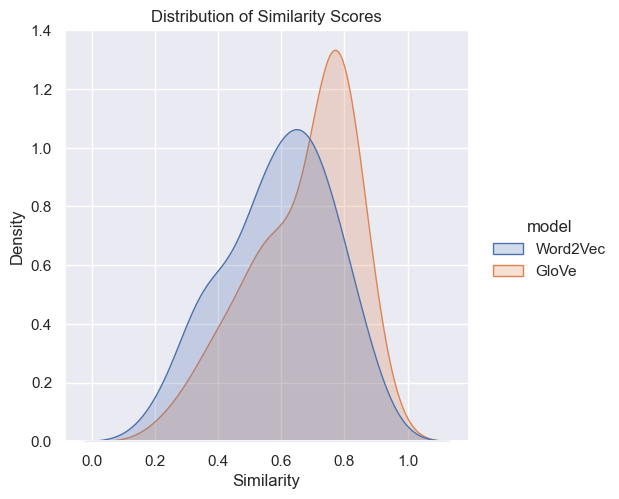

In [24]:
similarities = simlex_similar_pairs.copy()

# plots the distribution of similarity scores for each model
sims_w2v = similarities[['similarity_w2v']].rename(columns={'similarity_w2v': 'similarity'})
sims_w2v['model'] = 'Word2Vec'

# Rename and add a 'model' column for GloVe similarities
sims_glove = similarities[['similarity_glove']].rename(columns={'similarity_glove': 'similarity'})
sims_glove['model'] = 'GloVe'

# Combine the two DataFrames
to_plot = pd.concat([sims_w2v, sims_glove], ignore_index=True)

# Plot the distribution using Seaborn's displot with KDE
sns.displot(to_plot, x="similarity", hue="model", kind="kde", fill=True)

# Optional: Improve the plot's appearance
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity')
plt.ylabel('Density')

<div style="padding:8px 0 8px 15px;border-left:3px solid gray;background-color:#F3F3F3;">

#### Extra quiz: 
Think about which model seems to perform better on these high-similarity examples and why based on your knowledge of how the embedding models have been trained.

</div>

----

<a id="3"></a>
## 3. TASK C: Sentiment analysis of movie reviews

For this part, we will be using only the GloVe pre-trained embeddings. 

**Data:** We will build a sentiment classification model using the IMDB review dataset.

> - Download the dataset [here](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download?datasetVersionNumber=1)
> - Save the .csv file in the same dir as this notebook. 

The IMDB dataset has 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing.

The goal is to predict if a review is positive or negative using a classification (potentiall deep learning) algorithm.

For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

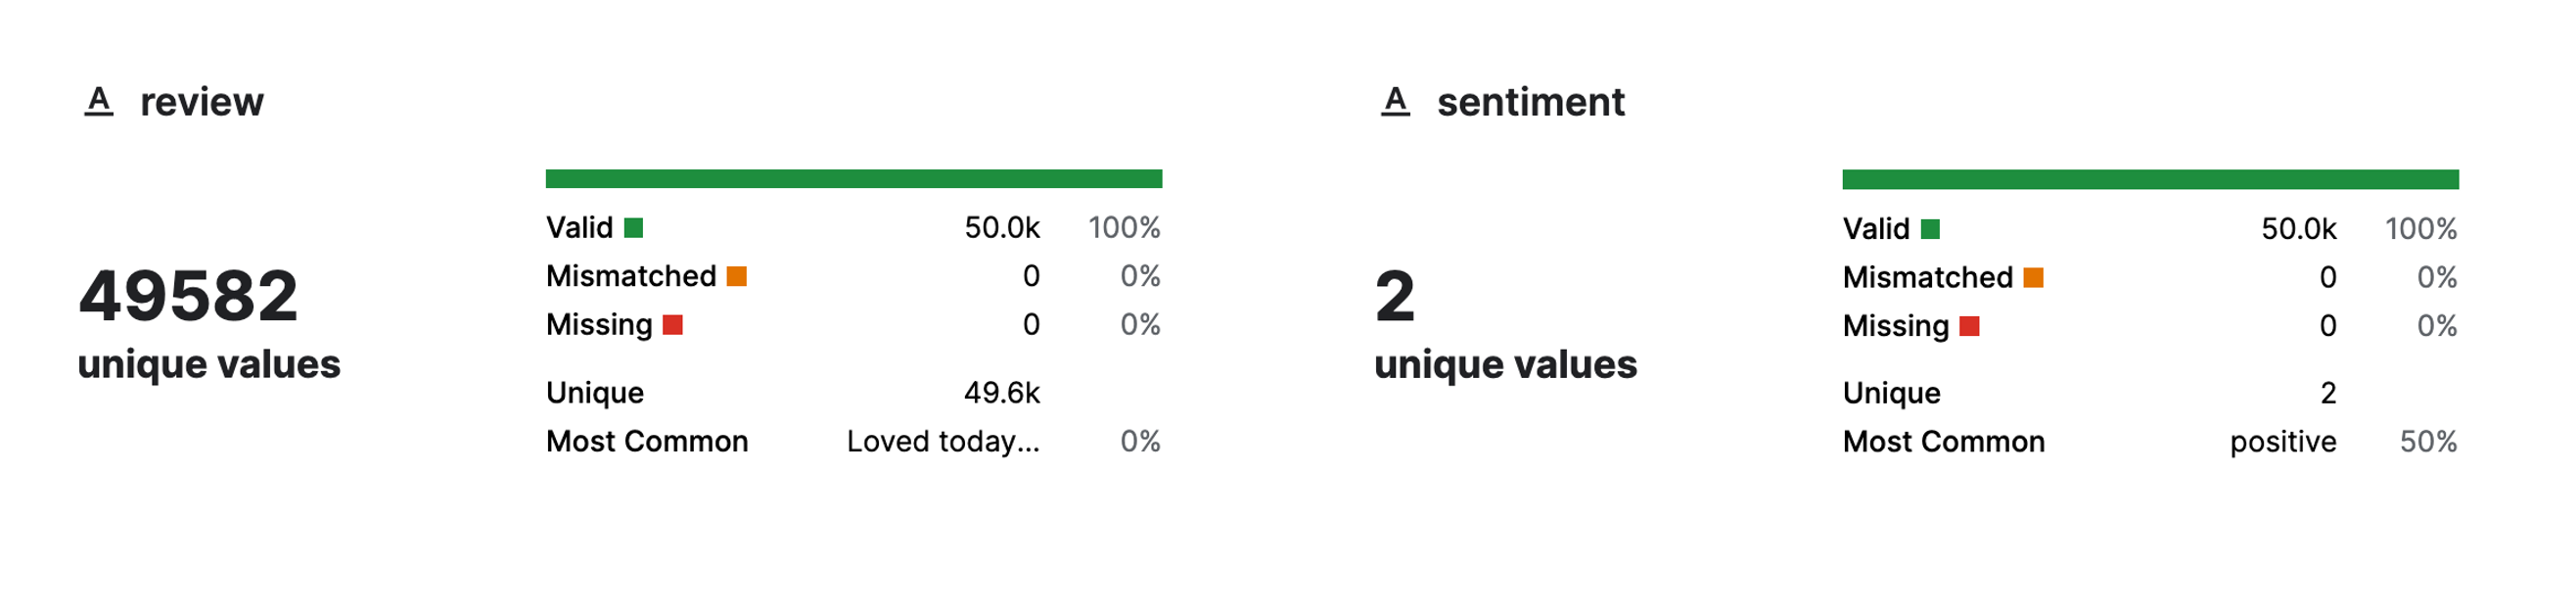

### 3.1 Dataset exploration

In [25]:
#read dataset
movie_reviews = pd.read_csv('IMDB Dataset.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [26]:
print('Number of movie reviews: {}'.format(len(movie_reviews)))
classes = movie_reviews['sentiment'].unique()
print('Number of classes: {} with values: {}'.format(len(classes), classes))

Number of movie reviews: 50000
Number of classes: 2 with values: ['positive' 'negative']


# of positive samples: 25000
# of negative samples: 25000


<Axes: xlabel='sentiment', ylabel='count'>

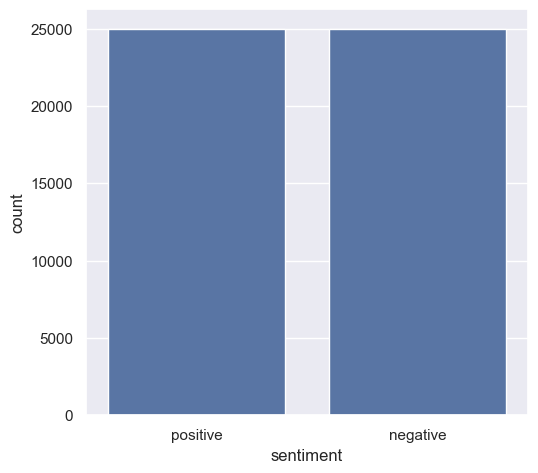

In [27]:
# class distribution
positive = len(movie_reviews[movie_reviews['sentiment']=='positive'])
negative = len(movie_reviews[movie_reviews['sentiment']=='negative'])

print('# of positive samples: {}'.format(positive))
print('# of negative samples: {}'.format(negative))

sns.set_theme(rc={'figure.figsize':(5.7,5.27)})
sns.countplot(x=movie_reviews['sentiment'])

### 3.2 Data preprocessing

To build our classifier, we will leverage the pre-trained word embeddings (GloVe). Going from word embeddings to sentence vectors, we will need to find a way to take into account the embeddings of all the words each review contains. We will apply 2 techniques to do so: average and max pooling.  

We will perform the following preprocessing steps:
- Change the classes from str (negative, positive) to binary `(0, 1)`.
- Get word embeddings and calculate the sentence vectors with both max and avg pooling.
- Create a `pytorch.Dataset` instance of the IMDB data.

#### From class names to binary

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Change the classe names from str (negative, positive) to binary `(0, 1)` and add it as a new column to the exising dataframe.

</div>

In [28]:
# classes to binary
movie_reviews['target'] = movie_reviews['sentiment'].map({'positive': 1, 'negative': 0})
movie_reviews.head()

,review,sentiment,target
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


#### From word embeddings to review embeddings

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** For each review in the dataset, calculate the review vector by pooling from the review's word embeddings. Implement both max and avg pooling.
- 💻 **API:** You can use numpy functions to manipulate the arrays. For review tokenization you can use `gensim.utils.tokenize` function.

</div>

In [29]:
# apply embedding model to reviews
review_vectors_max = list()
review_vectors_avg = list()
for index, row in tqdm(movie_reviews.iterrows()):
#for index, row in tqdm(movie_reviews.head(1).iterrows()):
    #print(row['review'])
    # tokenize sentence
    tokens = list(tokenize(row['review'], deacc = True))
    word_vectors = list()
    for token in tokens:
        
        # get the pre-trained embedding for the token
        if token.lower() in glove_vectors.key_to_index.keys():
            vector = glove_vectors[token.lower()]
            #print(f"vector for {token.lower()}: {vector}")
            word_vectors.append(vector)
    
    # for all word embeddings => compute the sentence embedding (both by summing and averaging word embeedings)
    review_vec_max = np.array(word_vectors).max(axis=0)
    review_vec_avg = np.array(word_vectors).mean(axis=0)
    review_vectors_max.append(review_vec_max)
    review_vectors_avg.append(review_vec_avg)
    
# transform to arrays
review_vectors_max = np.array(review_vectors_max)
review_vectors_avg = np.array(review_vectors_avg)

17717it [00:09, 1786.24it/s]

50000it [00:27, 1799.48it/s]


In [30]:
# The shape is (50.000, 100) which means that we have 50.000 reviews and each review is represented by a 100-dimensional vector.
review_vectors_max.shape

(50000, 100)

#### Pytorch Dataset class for the imported data

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Create a pytorch Dataset class with the input data. Instantiate this class with the input data.
- 💻 **API:** You can use `torch.utils.data.Dataset` class.

</div>

In [31]:
# create a pytorch Dataset class for our imported data
class IMDBreviews(Dataset):
    def __init__(self, review_vectors, targets):
        self.x=torch.tensor(review_vectors)
        self.y=torch.tensor(targets)
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    
dataset = IMDBreviews(review_vectors_avg, movie_reviews['target'].values)

In [32]:
# print tensors for sanity check
print('Total samples {} with sentence embedding size: {}'.format(dataset.x.shape[0], dataset.x.shape[1]))

Total samples 50000 with sentence embedding size: 100


#### Splitting dataset to train and test subsets

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Split the dataset into train and test tests (80-20% splits).
- 💻 **API:** You can use `torch.utils.data.random_split` function.

</div>

In [33]:
# split to train and test sets using torch.utils.data.random_split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train, test = torch.utils.data.random_split(dataset, [train_size, test_size])

In [34]:
print('Train size: {}'.format(len(train)))
print('Test size: {}'.format(len(test)))

Train size: 40000
Test size: 10000


### 3.3 Train & evaluate a classifier on the movie reviews

Once we have proprocessed the data, we will create the training and evaluation pipelines.


#### Pytorch Module class for model setup

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Create a pytorch model class. The architecture of the model can be as simple as a Linear layer along with a sigmoid activation function, or a more complicated deep architecture. Play around with different settings and architectures.
- 💻 **API:** You can use `torch.nn.Module` class.

</div>

In [35]:
# create a pytorch nn.Module class for the simple NN model
class SentimentAnalysisModel(nn.Module):
    def __init__(self, features):
        # super() function is used to call the __init__() of the parent class (nn.Module)
        super(SentimentAnalysisModel, self).__init__()
        # nn.Linear(features.shape[1], 1) creates a linear transformation with input size features.shape[1] and output size 1
        self.linear = nn.Linear(features.shape[1], 1)

    def forward(self, text, offsets):
        # apply the linear transformation to the input tensor
        out = torch.sigmoid(self.linear(text))
        return out

In [36]:
# dataset.x is a tensor with shape (50000, 100)
print(dataset.x.shape)
# dataset.y is a tensor with shape (50000,)
print(dataset.y.shape)

torch.Size([50000, 100])
torch.Size([50000])


In [37]:
model = SentimentAnalysisModel(dataset.x)
model

SentimentAnalysisModel(
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [38]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')
# the model has 101 trainable parameters (100 for the weights and 1 for the bias)

The model has 101 trainable parameters


#### Pytorch Data loader class for dataset batching

In [39]:
# create data loader
# Batch size is refers to the number of training examples utilized in one iteration
BATCH_SIZE = 64
# DataLoader combines a dataset and a sampler, and provides an iterable over the given dataset
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
test_loader= DataLoader(test, batch_size=BATCH_SIZE)

#### Training the model

In [40]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
from torch import optim
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [41]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[-0.0641,  0.0496,  0.0536,  0.0973,  0.0643,  0.0255,  0.0454,  0.0483,
         -0.0071, -0.0699, -0.0767, -0.0551, -0.0887, -0.0299, -0.0369, -0.0766,
         -0.0333, -0.0692, -0.0739,  0.0491,  0.0290, -0.0884,  0.0277,  0.0554,
         -0.0341, -0.0241,  0.0772, -0.0773,  0.0414,  0.0753,  0.0479, -0.0346,
          0.0832, -0.0818, -0.0524, -0.0290, -0.0066, -0.0804, -0.0101, -0.0757,
          0.0719, -0.0949,  0.0278,  0.0448,  0.0978, -0.0151, -0.0715, -0.0391,
          0.0271,  0.0032, -0.0344, -0.0658, -0.0010,  0.0834,  0.0994, -0.0909,
         -0.0210,  0.0648,  0.0833,  0.0837,  0.0281, -0.0647, -0.0366, -0.0202,
         -0.0224, -0.0056, -0.0248, -0.0659,  0.0427,  0.0189, -0.0077, -0.0127,
         -0.0609, -0.0907,  0.0959,  0.0620,  0.0397, -0.0740,  0.0941,  0.0484,
         -0.0210,  0.0959, -0.0452,  0.0820,  0.0091,  0.0866,  0.0819,  0.0813,
          0.0433, -0.0940,  0.0299,  0.0843, -0.0478,  0.0880,  0.0164, -0.0353,
         -0.06

<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Create the training loop: for each epoch, do the forward pass, compute the loss and do the backward propagation.
- 💻 **API:** Check the official API for the [training process](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#train-the-network).

</div>

In [42]:
# Training loop
model.train()
for epoch in range(50):
    epoch_loss = 0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        # inputs is a tensor with shape (BATCH_SIZE, 100)
        # labels is a tensor with shape (BATCH_SIZE,)
        inputs, labels = data

        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(inputs, labels.float())

        # Compute loss
        # criterion takes the predicted y and the true y and returns the loss
        loss = criterion(torch.squeeze(y_pred), labels.float())
        # epoch loss is the sum of all losses in the epoch
        epoch_loss += loss
        
        # Zero gradients, perform a backward pass, and update the weights.
        # We first zero the gradients to prevent them from accumulating in the next iteration
        optimizer.zero_grad()
        # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True
        # loss.backward is used to compute the gradients of the loss with respect to the model parameters
        loss.backward()
        # optimizer.step updates the value of x using the gradient x.grad
        optimizer.step()
    
    print(f'Epoch {epoch + 1} | Loss: {(epoch_loss / len(train_loader)):.4f}')

Epoch 1 | Loss: 0.6613
Epoch 2 | Loss: 0.6261
Epoch 3 | Loss: 0.6045
Epoch 4 | Loss: 0.5884
Epoch 5 | Loss: 0.5756
Epoch 6 | Loss: 0.5655
Epoch 7 | Loss: 0.5570
Epoch 8 | Loss: 0.5497
Epoch 9 | Loss: 0.5434
Epoch 10 | Loss: 0.5372
Epoch 11 | Loss: 0.5323
Epoch 12 | Loss: 0.5280
Epoch 13 | Loss: 0.5238
Epoch 14 | Loss: 0.5201
Epoch 15 | Loss: 0.5169
Epoch 16 | Loss: 0.5138
Epoch 17 | Loss: 0.5107
Epoch 18 | Loss: 0.5079
Epoch 19 | Loss: 0.5054


Epoch 20 | Loss: 0.5033
Epoch 21 | Loss: 0.5010
Epoch 22 | Loss: 0.4990
Epoch 23 | Loss: 0.4972
Epoch 24 | Loss: 0.4955
Epoch 25 | Loss: 0.4935
Epoch 26 | Loss: 0.4923
Epoch 27 | Loss: 0.4905
Epoch 28 | Loss: 0.4888
Epoch 29 | Loss: 0.4877
Epoch 30 | Loss: 0.4861
Epoch 31 | Loss: 0.4852
Epoch 32 | Loss: 0.4841
Epoch 33 | Loss: 0.4829
Epoch 34 | Loss: 0.4814
Epoch 35 | Loss: 0.4805
Epoch 36 | Loss: 0.4796
Epoch 37 | Loss: 0.4783
Epoch 38 | Loss: 0.4776
Epoch 39 | Loss: 0.4764
Epoch 40 | Loss: 0.4755
Epoch 41 | Loss: 0.4746
Epoch 42 | Loss: 0.4741
Epoch 43 | Loss: 0.4733
Epoch 44 | Loss: 0.4725
Epoch 45 | Loss: 0.4716
Epoch 46 | Loss: 0.4710
Epoch 47 | Loss: 0.4702
Epoch 48 | Loss: 0.4698
Epoch 49 | Loss: 0.4691
Epoch 50 | Loss: 0.4682


#### Inference on the test set


<div style="padding:8px 0 8px 15px;border-left:3px solid #03befc;background-color:#F3F3F3;">

- 🎯 **Goal:** Evaluate your model on the test set: for each batch of data, do the forward pass and compute the loss and the accuracy score.
- 💻 **API:** Check the official API for the [testing process](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#test-the-network-on-the-test-data).

</div>

In [43]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[-2.0820,  0.8406, -0.9172,  2.7078,  2.9113, -0.1858,  0.1727, -1.3589,
         -4.2255, -2.9508, -0.7017, -3.4218, -0.2353, -0.1942, -1.3632,  0.3494,
          1.4083, -0.9999, -3.7229,  0.7272, -0.5627, -2.0642, -1.1609, -0.0355,
          2.1588,  1.8440,  2.0450,  0.6622,  1.9088, -0.4884, -2.9693,  1.9055,
         -1.1693,  2.6787,  3.2228,  0.6514,  0.5825,  0.7895, -1.3607, -2.8063,
          1.7153, -2.7241,  3.5900, -1.3253, -0.5770,  1.2386,  1.9402, -1.7825,
          5.3433,  0.9160, -1.5495, -0.5307, -0.3647,  0.5741,  1.6419, -0.8943,
          2.1361, -0.4508, -0.2421, -0.4938,  1.2882,  3.4401,  1.1892, -1.5389,
          0.6129,  0.7112, -2.9664,  0.9410,  3.4458,  1.5001,  3.2841,  1.0890,
         -0.0498, -2.5922,  1.3052,  0.0708,  1.9265, -3.9326,  1.8171, -2.1075,
          0.2802,  1.0777,  1.7341,  2.3769,  4.3425,  1.1658, -1.3638, -0.8831,
         -0.9523,  0.2275,  0.2168, -0.5516,  1.3078,  0.0683, -3.3178,  1.5440,
         -1.88

In [44]:
batch_loss = 0
batch_acc = 0

model.eval()
# If you don't wrap eval code in torch.no_grad():,
# PyTorch will still track operations on tensors for which requires_grad=True, 
# preparing to calculate gradients that you won't actually use. 
with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        # get the inputs
        inputs, labels = data
        
        # run forward pass
        predictions = model(inputs, labels.float())
        
        # Compute and print loss
        predictions = torch.squeeze(predictions)
        test_loss = criterion(predictions, labels.float())
        predictions = torch.tensor([1. if i > 0.5 else 0. for i in predictions])
        
        # BinaryAccuracy() computes the accuracy for binary classification
        acc = BinaryAccuracy()
        acc = acc(labels, predictions)
        
        batch_loss += test_loss.item()
        batch_acc += acc.item()

test_loss = batch_loss / len(test_loader)
test_acc = batch_acc / len(test_loader)

print(f'Test Acc: {test_acc*100:.2f}%')

Test Acc: 79.27%


<div style="padding:8px 0 8px 15px;border-left:3px solid gray;background-color:#F3F3F3;">

#### Extra quiz:
Play around with different settings (e.g. learning rate, batch size, epochs) and different architectures. Additionally try different pooling methods. Think how your design choices affect model performance on both train and test sets.

</div>

In [46]:
import wandb 

dataset_avg = IMDBreviews(review_vectors_avg, movie_reviews['target'].values)
dataset_max = IMDBreviews(review_vectors_max, movie_reviews['target'].values)

# Hyperparameters sets
learning_rates = [1e-3, 1e-2, 1e-1]
batch_sizes = [32, 64, 128]
num_epochs = [30, 50, 70]

# Assuming train and test datasets are already defined
def train_and_evaluate(dataset, learning_rate, batch_size, epochs, pool_type):
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train, test = torch.utils.data.random_split(dataset, [train_size, test_size])
    
    # Initialize wandb run
    wandb.init(project="modern_nlp_ex_1", entity="pierrehogenhaug", reinit=True)
    wandb.config.update({
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "epochs": epochs,
        "pool_type": pool_type  # Track the type of pooling used
    })
    
    train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test, batch_size=batch_size)

    model = SentimentAnalysisModel(dataset.x)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Training loop
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for _, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            y_pred = model(inputs, labels.float())
            loss = criterion(torch.squeeze(y_pred), labels.float())
            epoch_loss += loss.item()
            loss.backward()
            optimizer.step()
        
        # Log the training loss to W&B after each epoch
        wandb.log({"epoch": epoch + 1, "train_loss": epoch_loss / len(train_loader)})
        print(f'Epoch {epoch + 1}/{epochs} | Loss: {epoch_loss / len(train_loader):.4f}')

    # Evaluation loop
    model.eval()
    with torch.no_grad():
        batch_loss = 0
        batch_acc = 0
        for _, data in enumerate(test_loader, 0):
            inputs, labels = data
            predictions = model(inputs, labels.float())
            predictions = torch.squeeze(predictions)
            test_loss = criterion(torch.squeeze(predictions), labels.float())
            predictions = torch.tensor([1. if i > 0.5 else 0. for i in predictions])
            acc = BinaryAccuracy()
            acc = acc(labels, predictions)
            batch_loss += test_loss.item()
            batch_acc += acc.item()
    test_loss = batch_loss / len(test_loader)
    test_acc = batch_acc / len(test_loader)

    # Log test loss and accuracy to wandb
    wandb.log({"test_loss": test_loss, "test_accuracy": test_acc})
    print(f'Test Acc: {test_acc*100:.2f}%')

    # Finish the wandb run
    wandb.finish()
    
# Loop over datasets, hyperparameters, and pool types
for pool_type, dataset in [("avg_pool", dataset_avg), ("max_pool", dataset_max)]:
    for lr in learning_rates:
        for bs in batch_sizes:
            for epochs in num_epochs:
                print(f"\nTraining with {pool_type}, lr={lr}, batch_size={bs}, epochs={epochs}")
                train_and_evaluate(dataset, lr, bs, epochs, pool_type)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.



Training with avg_pool, lr=0.001, batch_size=32, epochs=30


wandb: Currently logged in as: pierrehogenhaug. Use `wandb login --relogin` to force relogin


Epoch 1/30 | Loss: 0.6920
Epoch 2/30 | Loss: 0.6898
Epoch 3/30 | Loss: 0.6883
Epoch 4/30 | Loss: 0.6868
Epoch 5/30 | Loss: 0.6853
Epoch 6/30 | Loss: 0.6838
Epoch 7/30 | Loss: 0.6824
Epoch 8/30 | Loss: 0.6810
Epoch 9/30 | Loss: 0.6796
Epoch 10/30 | Loss: 0.6782
Epoch 11/30 | Loss: 0.6770
Epoch 12/30 | Loss: 0.6757
Epoch 13/30 | Loss: 0.6744
Epoch 14/30 | Loss: 0.6732
Epoch 15/30 | Loss: 0.6720
Epoch 16/30 | Loss: 0.6708
Epoch 17/30 | Loss: 0.6696
Epoch 18/30 | Loss: 0.6684
Epoch 19/30 | Loss: 0.6673
Epoch 20/30 | Loss: 0.6662
Epoch 21/30 | Loss: 0.6651
Epoch 22/30 | Loss: 0.6641
Epoch 23/30 | Loss: 0.6630
Epoch 24/30 | Loss: 0.6620
Epoch 25/30 | Loss: 0.6610
Epoch 26/30 | Loss: 0.6600
Epoch 27/30 | Loss: 0.6590
Epoch 28/30 | Loss: 0.6580
Epoch 29/30 | Loss: 0.6571
Epoch 30/30 | Loss: 0.6562
Test Acc: 68.21%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
epoch,30
test_accuracy,0.68211
test_loss,0.65547
train_loss,0.65616



Training with avg_pool, lr=0.001, batch_size=32, epochs=50


Epoch 1/50 | Loss: 0.6910
Epoch 2/50 | Loss: 0.6890
Epoch 3/50 | Loss: 0.6875
Epoch 4/50 | Loss: 0.6861
Epoch 5/50 | Loss: 0.6847
Epoch 6/50 | Loss: 0.6833
Epoch 7/50 | Loss: 0.6819
Epoch 8/50 | Loss: 0.6806
Epoch 9/50 | Loss: 0.6792
Epoch 10/50 | Loss: 0.6780
Epoch 11/50 | Loss: 0.6767
Epoch 12/50 | Loss: 0.6755
Epoch 13/50 | Loss: 0.6743
Epoch 14/50 | Loss: 0.6731
Epoch 15/50 | Loss: 0.6719
Epoch 16/50 | Loss: 0.6707
Epoch 17/50 | Loss: 0.6696
Epoch 18/50 | Loss: 0.6685
Epoch 19/50 | Loss: 0.6674
Epoch 20/50 | Loss: 0.6663
Epoch 21/50 | Loss: 0.6653
Epoch 22/50 | Loss: 0.6643
Epoch 23/50 | Loss: 0.6632
Epoch 24/50 | Loss: 0.6622
Epoch 25/50 | Loss: 0.6613
Epoch 26/50 | Loss: 0.6603
Epoch 27/50 | Loss: 0.6594
Epoch 28/50 | Loss: 0.6584
Epoch 29/50 | Loss: 0.6574
Epoch 30/50 | Loss: 0.6566
Epoch 31/50 | Loss: 0.6557
Epoch 32/50 | Loss: 0.6548
Epoch 33/50 | Loss: 0.6539
Epoch 34/50 | Loss: 0.6531
Epoch 35/50 | Loss: 0.6523
Epoch 36/50 | Loss: 0.6514
Epoch 37/50 | Loss: 0.6506
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,███▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
epoch,50
test_accuracy,0.69279
test_loss,0.6386
train_loss,0.64096



Training with avg_pool, lr=0.001, batch_size=32, epochs=70


Epoch 1/70 | Loss: 0.6931
Epoch 2/70 | Loss: 0.6912
Epoch 3/70 | Loss: 0.6897
Epoch 4/70 | Loss: 0.6882
Epoch 5/70 | Loss: 0.6867
Epoch 6/70 | Loss: 0.6852
Epoch 7/70 | Loss: 0.6838
Epoch 8/70 | Loss: 0.6824
Epoch 9/70 | Loss: 0.6810
Epoch 10/70 | Loss: 0.6797
Epoch 11/70 | Loss: 0.6784
Epoch 12/70 | Loss: 0.6771
Epoch 13/70 | Loss: 0.6759
Epoch 14/70 | Loss: 0.6746
Epoch 15/70 | Loss: 0.6734
Epoch 16/70 | Loss: 0.6722
Epoch 17/70 | Loss: 0.6710
Epoch 18/70 | Loss: 0.6698
Epoch 19/70 | Loss: 0.6687
Epoch 20/70 | Loss: 0.6676
Epoch 21/70 | Loss: 0.6665
Epoch 22/70 | Loss: 0.6655
Epoch 23/70 | Loss: 0.6644
Epoch 24/70 | Loss: 0.6634
Epoch 25/70 | Loss: 0.6624
Epoch 26/70 | Loss: 0.6613
Epoch 27/70 | Loss: 0.6604
Epoch 28/70 | Loss: 0.6594
Epoch 29/70 | Loss: 0.6584
Epoch 30/70 | Loss: 0.6575
Epoch 31/70 | Loss: 0.6566
Epoch 32/70 | Loss: 0.6557
Epoch 33/70 | Loss: 0.6548
Epoch 34/70 | Loss: 0.6539
Epoch 35/70 | Loss: 0.6530
Epoch 36/70 | Loss: 0.6522
Epoch 37/70 | Loss: 0.6513
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
epoch,70
test_accuracy,0.69439
test_loss,0.62778
train_loss,0.62886



Training with avg_pool, lr=0.001, batch_size=64, epochs=30


Epoch 1/30 | Loss: 0.6945
Epoch 2/30 | Loss: 0.6887
Epoch 3/30 | Loss: 0.6879
Epoch 4/30 | Loss: 0.6872
Epoch 5/30 | Loss: 0.6864
Epoch 6/30 | Loss: 0.6857
Epoch 7/30 | Loss: 0.6850
Epoch 8/30 | Loss: 0.6843
Epoch 9/30 | Loss: 0.6836
Epoch 10/30 | Loss: 0.6829
Epoch 11/30 | Loss: 0.6822
Epoch 12/30 | Loss: 0.6815
Epoch 13/30 | Loss: 0.6809
Epoch 14/30 | Loss: 0.6802
Epoch 15/30 | Loss: 0.6795
Epoch 16/30 | Loss: 0.6789
Epoch 17/30 | Loss: 0.6782
Epoch 18/30 | Loss: 0.6776
Epoch 19/30 | Loss: 0.6770
Epoch 20/30 | Loss: 0.6763
Epoch 21/30 | Loss: 0.6757
Epoch 22/30 | Loss: 0.6751
Epoch 23/30 | Loss: 0.6745
Epoch 24/30 | Loss: 0.6739
Epoch 25/30 | Loss: 0.6733
Epoch 26/30 | Loss: 0.6727
Epoch 27/30 | Loss: 0.6721
Epoch 28/30 | Loss: 0.6715
Epoch 29/30 | Loss: 0.6709
Epoch 30/30 | Loss: 0.6704
Test Acc: 66.27%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
epoch,30
test_accuracy,0.66272
test_loss,0.67068
train_loss,0.67037



Training with avg_pool, lr=0.001, batch_size=64, epochs=50


Epoch 1/50 | Loss: 0.6942
Epoch 2/50 | Loss: 0.6932
Epoch 3/50 | Loss: 0.6924
Epoch 4/50 | Loss: 0.6916
Epoch 5/50 | Loss: 0.6908
Epoch 6/50 | Loss: 0.6900
Epoch 7/50 | Loss: 0.6892
Epoch 8/50 | Loss: 0.6885
Epoch 9/50 | Loss: 0.6877
Epoch 10/50 | Loss: 0.6869
Epoch 11/50 | Loss: 0.6862
Epoch 12/50 | Loss: 0.6855
Epoch 13/50 | Loss: 0.6848
Epoch 14/50 | Loss: 0.6840
Epoch 15/50 | Loss: 0.6833
Epoch 16/50 | Loss: 0.6826
Epoch 17/50 | Loss: 0.6819
Epoch 18/50 | Loss: 0.6812
Epoch 19/50 | Loss: 0.6805
Epoch 20/50 | Loss: 0.6799
Epoch 21/50 | Loss: 0.6792
Epoch 22/50 | Loss: 0.6785
Epoch 23/50 | Loss: 0.6779
Epoch 24/50 | Loss: 0.6772
Epoch 25/50 | Loss: 0.6766
Epoch 26/50 | Loss: 0.6760
Epoch 27/50 | Loss: 0.6753
Epoch 28/50 | Loss: 0.6747
Epoch 29/50 | Loss: 0.6741
Epoch 30/50 | Loss: 0.6735
Epoch 31/50 | Loss: 0.6729
Epoch 32/50 | Loss: 0.6723
Epoch 33/50 | Loss: 0.6717
Epoch 34/50 | Loss: 0.6711
Epoch 35/50 | Loss: 0.6705
Epoch 36/50 | Loss: 0.6699
Epoch 37/50 | Loss: 0.6693
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
epoch,50
test_accuracy,0.6669
test_loss,0.66289
train_loss,0.66237



Training with avg_pool, lr=0.001, batch_size=64, epochs=70


Epoch 1/70 | Loss: 0.6897
Epoch 2/70 | Loss: 0.6883
Epoch 3/70 | Loss: 0.6875
Epoch 4/70 | Loss: 0.6868
Epoch 5/70 | Loss: 0.6860
Epoch 6/70 | Loss: 0.6853
Epoch 7/70 | Loss: 0.6845
Epoch 8/70 | Loss: 0.6838
Epoch 9/70 | Loss: 0.6831
Epoch 10/70 | Loss: 0.6824
Epoch 11/70 | Loss: 0.6817
Epoch 12/70 | Loss: 0.6810
Epoch 13/70 | Loss: 0.6803
Epoch 14/70 | Loss: 0.6797
Epoch 15/70 | Loss: 0.6790
Epoch 16/70 | Loss: 0.6783
Epoch 17/70 | Loss: 0.6777
Epoch 18/70 | Loss: 0.6770
Epoch 19/70 | Loss: 0.6764
Epoch 20/70 | Loss: 0.6757
Epoch 21/70 | Loss: 0.6751
Epoch 22/70 | Loss: 0.6745
Epoch 23/70 | Loss: 0.6739
Epoch 24/70 | Loss: 0.6733
Epoch 25/70 | Loss: 0.6726
Epoch 26/70 | Loss: 0.6720
Epoch 27/70 | Loss: 0.6714
Epoch 28/70 | Loss: 0.6709
Epoch 29/70 | Loss: 0.6703
Epoch 30/70 | Loss: 0.6697
Epoch 31/70 | Loss: 0.6691
Epoch 32/70 | Loss: 0.6685
Epoch 33/70 | Loss: 0.6680
Epoch 34/70 | Loss: 0.6674
Epoch 35/70 | Loss: 0.6669
Epoch 36/70 | Loss: 0.6663
Epoch 37/70 | Loss: 0.6658
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
epoch,70
test_accuracy,0.68322
test_loss,0.64995
train_loss,0.65028



Training with avg_pool, lr=0.001, batch_size=128, epochs=30


Epoch 1/30 | Loss: 0.7018
Epoch 2/30 | Loss: 0.6934
Epoch 3/30 | Loss: 0.6923
Epoch 4/30 | Loss: 0.6919
Epoch 5/30 | Loss: 0.6915
Epoch 6/30 | Loss: 0.6911
Epoch 7/30 | Loss: 0.6907
Epoch 8/30 | Loss: 0.6903
Epoch 9/30 | Loss: 0.6900
Epoch 10/30 | Loss: 0.6896
Epoch 11/30 | Loss: 0.6892
Epoch 12/30 | Loss: 0.6888
Epoch 13/30 | Loss: 0.6885
Epoch 14/30 | Loss: 0.6881
Epoch 15/30 | Loss: 0.6877
Epoch 16/30 | Loss: 0.6874
Epoch 17/30 | Loss: 0.6870
Epoch 18/30 | Loss: 0.6866
Epoch 19/30 | Loss: 0.6863
Epoch 20/30 | Loss: 0.6859
Epoch 21/30 | Loss: 0.6856
Epoch 22/30 | Loss: 0.6852
Epoch 23/30 | Loss: 0.6849
Epoch 24/30 | Loss: 0.6845
Epoch 25/30 | Loss: 0.6841
Epoch 26/30 | Loss: 0.6838
Epoch 27/30 | Loss: 0.6835
Epoch 28/30 | Loss: 0.6831
Epoch 29/30 | Loss: 0.6828
Epoch 30/30 | Loss: 0.6824
Test Acc: 63.87%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
epoch,30
test_accuracy,0.63875
test_loss,0.6823
train_loss,0.68241



Training with avg_pool, lr=0.001, batch_size=128, epochs=50


Epoch 1/50 | Loss: 0.6955
Epoch 2/50 | Loss: 0.6949
Epoch 3/50 | Loss: 0.6945
Epoch 4/50 | Loss: 0.6941
Epoch 5/50 | Loss: 0.6937
Epoch 6/50 | Loss: 0.6933
Epoch 7/50 | Loss: 0.6929
Epoch 8/50 | Loss: 0.6925
Epoch 9/50 | Loss: 0.6920
Epoch 10/50 | Loss: 0.6916
Epoch 11/50 | Loss: 0.6913
Epoch 12/50 | Loss: 0.6909
Epoch 13/50 | Loss: 0.6905
Epoch 14/50 | Loss: 0.6901
Epoch 15/50 | Loss: 0.6897
Epoch 16/50 | Loss: 0.6893
Epoch 17/50 | Loss: 0.6889
Epoch 18/50 | Loss: 0.6885
Epoch 19/50 | Loss: 0.6882
Epoch 20/50 | Loss: 0.6878
Epoch 21/50 | Loss: 0.6874
Epoch 22/50 | Loss: 0.6870
Epoch 23/50 | Loss: 0.6867
Epoch 24/50 | Loss: 0.6863
Epoch 25/50 | Loss: 0.6859
Epoch 26/50 | Loss: 0.6856
Epoch 27/50 | Loss: 0.6852
Epoch 28/50 | Loss: 0.6848
Epoch 29/50 | Loss: 0.6845
Epoch 30/50 | Loss: 0.6841
Epoch 31/50 | Loss: 0.6838
Epoch 32/50 | Loss: 0.6834
Epoch 33/50 | Loss: 0.6831
Epoch 34/50 | Loss: 0.6827
Epoch 35/50 | Loss: 0.6824
Epoch 36/50 | Loss: 0.6820
Epoch 37/50 | Loss: 0.6817
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
epoch,50
test_accuracy,0.68651
test_loss,0.67687
train_loss,0.67735



Training with avg_pool, lr=0.001, batch_size=128, epochs=70


Epoch 1/70 | Loss: 0.6938
Epoch 2/70 | Loss: 0.6933
Epoch 3/70 | Loss: 0.6929
Epoch 4/70 | Loss: 0.6925
Epoch 5/70 | Loss: 0.6921
Epoch 6/70 | Loss: 0.6917
Epoch 7/70 | Loss: 0.6913
Epoch 8/70 | Loss: 0.6909
Epoch 9/70 | Loss: 0.6905
Epoch 10/70 | Loss: 0.6902
Epoch 11/70 | Loss: 0.6898
Epoch 12/70 | Loss: 0.6894
Epoch 13/70 | Loss: 0.6890
Epoch 14/70 | Loss: 0.6887
Epoch 15/70 | Loss: 0.6883
Epoch 16/70 | Loss: 0.6879
Epoch 17/70 | Loss: 0.6876
Epoch 18/70 | Loss: 0.6872
Epoch 19/70 | Loss: 0.6868
Epoch 20/70 | Loss: 0.6865
Epoch 21/70 | Loss: 0.6861
Epoch 22/70 | Loss: 0.6857
Epoch 23/70 | Loss: 0.6854
Epoch 24/70 | Loss: 0.6850
Epoch 25/70 | Loss: 0.6847
Epoch 26/70 | Loss: 0.6843
Epoch 27/70 | Loss: 0.6840
Epoch 28/70 | Loss: 0.6836
Epoch 29/70 | Loss: 0.6833
Epoch 30/70 | Loss: 0.6829
Epoch 31/70 | Loss: 0.6826
Epoch 32/70 | Loss: 0.6823
Epoch 33/70 | Loss: 0.6819
Epoch 34/70 | Loss: 0.6816
Epoch 35/70 | Loss: 0.6813
Epoch 36/70 | Loss: 0.6809
Epoch 37/70 | Loss: 0.6806
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁
epoch,70
test_accuracy,0.66466
test_loss,0.67031
train_loss,0.67047



Training with avg_pool, lr=0.01, batch_size=32, epochs=30


Epoch 1/30 | Loss: 0.6868
Epoch 2/30 | Loss: 0.6740
Epoch 3/30 | Loss: 0.6631
Epoch 4/30 | Loss: 0.6541
Epoch 5/30 | Loss: 0.6463
Epoch 6/30 | Loss: 0.6394
Epoch 7/30 | Loss: 0.6331
Epoch 8/30 | Loss: 0.6276
Epoch 9/30 | Loss: 0.6225
Epoch 10/30 | Loss: 0.6178
Epoch 11/30 | Loss: 0.6134
Epoch 12/30 | Loss: 0.6093
Epoch 13/30 | Loss: 0.6056
Epoch 14/30 | Loss: 0.6019
Epoch 15/30 | Loss: 0.5985
Epoch 16/30 | Loss: 0.5953
Epoch 17/30 | Loss: 0.5922
Epoch 18/30 | Loss: 0.5893
Epoch 19/30 | Loss: 0.5866
Epoch 20/30 | Loss: 0.5840
Epoch 21/30 | Loss: 0.5813
Epoch 22/30 | Loss: 0.5790
Epoch 23/30 | Loss: 0.5766
Epoch 24/30 | Loss: 0.5743
Epoch 25/30 | Loss: 0.5723
Epoch 26/30 | Loss: 0.5701
Epoch 27/30 | Loss: 0.5682
Epoch 28/30 | Loss: 0.5663
Epoch 29/30 | Loss: 0.5644
Epoch 30/30 | Loss: 0.5625
Test Acc: 73.96%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
epoch,30
test_accuracy,0.73962
test_loss,0.55976
train_loss,0.56253



Training with avg_pool, lr=0.01, batch_size=32, epochs=50


Epoch 1/50 | Loss: 0.6843
Epoch 2/50 | Loss: 0.6711
Epoch 3/50 | Loss: 0.6599
Epoch 4/50 | Loss: 0.6507
Epoch 5/50 | Loss: 0.6427
Epoch 6/50 | Loss: 0.6357
Epoch 7/50 | Loss: 0.6295
Epoch 8/50 | Loss: 0.6238
Epoch 9/50 | Loss: 0.6188
Epoch 10/50 | Loss: 0.6141
Epoch 11/50 | Loss: 0.6098
Epoch 12/50 | Loss: 0.6058
Epoch 13/50 | Loss: 0.6020
Epoch 14/50 | Loss: 0.5984
Epoch 15/50 | Loss: 0.5951
Epoch 16/50 | Loss: 0.5921
Epoch 17/50 | Loss: 0.5890
Epoch 18/50 | Loss: 0.5861
Epoch 19/50 | Loss: 0.5834
Epoch 20/50 | Loss: 0.5807
Epoch 21/50 | Loss: 0.5783
Epoch 22/50 | Loss: 0.5759
Epoch 23/50 | Loss: 0.5736
Epoch 24/50 | Loss: 0.5714
Epoch 25/50 | Loss: 0.5693
Epoch 26/50 | Loss: 0.5673
Epoch 27/50 | Loss: 0.5653
Epoch 28/50 | Loss: 0.5634
Epoch 29/50 | Loss: 0.5615
Epoch 30/50 | Loss: 0.5597
Epoch 31/50 | Loss: 0.5580
Epoch 32/50 | Loss: 0.5563
Epoch 33/50 | Loss: 0.5547
Epoch 34/50 | Loss: 0.5532
Epoch 35/50 | Loss: 0.5516
Epoch 36/50 | Loss: 0.5502
Epoch 37/50 | Loss: 0.5487
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▇▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.7476
test_loss,0.53984
train_loss,0.53318



Training with avg_pool, lr=0.01, batch_size=32, epochs=70


Epoch 1/70 | Loss: 0.6866
Epoch 2/70 | Loss: 0.6732
Epoch 3/70 | Loss: 0.6626
Epoch 4/70 | Loss: 0.6534
Epoch 5/70 | Loss: 0.6454
Epoch 6/70 | Loss: 0.6383
Epoch 7/70 | Loss: 0.6323
Epoch 8/70 | Loss: 0.6267
Epoch 9/70 | Loss: 0.6215
Epoch 10/70 | Loss: 0.6168
Epoch 11/70 | Loss: 0.6124
Epoch 12/70 | Loss: 0.6084
Epoch 13/70 | Loss: 0.6045
Epoch 14/70 | Loss: 0.6009
Epoch 15/70 | Loss: 0.5975
Epoch 16/70 | Loss: 0.5945
Epoch 17/70 | Loss: 0.5912
Epoch 18/70 | Loss: 0.5883
Epoch 19/70 | Loss: 0.5857
Epoch 20/70 | Loss: 0.5830
Epoch 21/70 | Loss: 0.5805
Epoch 22/70 | Loss: 0.5779
Epoch 23/70 | Loss: 0.5755
Epoch 24/70 | Loss: 0.5734
Epoch 25/70 | Loss: 0.5712
Epoch 26/70 | Loss: 0.5691
Epoch 27/70 | Loss: 0.5670
Epoch 28/70 | Loss: 0.5652
Epoch 29/70 | Loss: 0.5634
Epoch 30/70 | Loss: 0.5615
Epoch 31/70 | Loss: 0.5598
Epoch 32/70 | Loss: 0.5581
Epoch 33/70 | Loss: 0.5565
Epoch 34/70 | Loss: 0.5548
Epoch 35/70 | Loss: 0.5533
Epoch 36/70 | Loss: 0.5518
Epoch 37/70 | Loss: 0.5503
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.76927
test_loss,0.51882
train_loss,0.5177



Training with avg_pool, lr=0.01, batch_size=64, epochs=30


Epoch 1/30 | Loss: 0.6897
Epoch 2/30 | Loss: 0.6821
Epoch 3/30 | Loss: 0.6755
Epoch 4/30 | Loss: 0.6694
Epoch 5/30 | Loss: 0.6638
Epoch 6/30 | Loss: 0.6588
Epoch 7/30 | Loss: 0.6542
Epoch 8/30 | Loss: 0.6498
Epoch 9/30 | Loss: 0.6459
Epoch 10/30 | Loss: 0.6421
Epoch 11/30 | Loss: 0.6387
Epoch 12/30 | Loss: 0.6354
Epoch 13/30 | Loss: 0.6324
Epoch 14/30 | Loss: 0.6293
Epoch 15/30 | Loss: 0.6267
Epoch 16/30 | Loss: 0.6240
Epoch 17/30 | Loss: 0.6214
Epoch 18/30 | Loss: 0.6190
Epoch 19/30 | Loss: 0.6166
Epoch 20/30 | Loss: 0.6144
Epoch 21/30 | Loss: 0.6123
Epoch 22/30 | Loss: 0.6101
Epoch 23/30 | Loss: 0.6082
Epoch 24/30 | Loss: 0.6063
Epoch 25/30 | Loss: 0.6043
Epoch 26/30 | Loss: 0.6025
Epoch 27/30 | Loss: 0.6007
Epoch 28/30 | Loss: 0.5991
Epoch 29/30 | Loss: 0.5973
Epoch 30/30 | Loss: 0.5958
Test Acc: 71.69%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
epoch,30
test_accuracy,0.71686
test_loss,0.59476
train_loss,0.59578



Training with avg_pool, lr=0.01, batch_size=64, epochs=50


Epoch 1/50 | Loss: 0.6902
Epoch 2/50 | Loss: 0.6827
Epoch 3/50 | Loss: 0.6760
Epoch 4/50 | Loss: 0.6700
Epoch 5/50 | Loss: 0.6644
Epoch 6/50 | Loss: 0.6594
Epoch 7/50 | Loss: 0.6548
Epoch 8/50 | Loss: 0.6504
Epoch 9/50 | Loss: 0.6464
Epoch 10/50 | Loss: 0.6427
Epoch 11/50 | Loss: 0.6391
Epoch 12/50 | Loss: 0.6359
Epoch 13/50 | Loss: 0.6327
Epoch 14/50 | Loss: 0.6298
Epoch 15/50 | Loss: 0.6271
Epoch 16/50 | Loss: 0.6244
Epoch 17/50 | Loss: 0.6219
Epoch 18/50 | Loss: 0.6193
Epoch 19/50 | Loss: 0.6170
Epoch 20/50 | Loss: 0.6148
Epoch 21/50 | Loss: 0.6126
Epoch 22/50 | Loss: 0.6105
Epoch 23/50 | Loss: 0.6085
Epoch 24/50 | Loss: 0.6065
Epoch 25/50 | Loss: 0.6047
Epoch 26/50 | Loss: 0.6027
Epoch 27/50 | Loss: 0.6010
Epoch 28/50 | Loss: 0.5993
Epoch 29/50 | Loss: 0.5976
Epoch 30/50 | Loss: 0.5960
Epoch 31/50 | Loss: 0.5943
Epoch 32/50 | Loss: 0.5928
Epoch 33/50 | Loss: 0.5913
Epoch 34/50 | Loss: 0.5898
Epoch 35/50 | Loss: 0.5884
Epoch 36/50 | Loss: 0.5870
Epoch 37/50 | Loss: 0.5856
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch,50
test_accuracy,0.73378
test_loss,0.56785
train_loss,0.57004



Training with avg_pool, lr=0.01, batch_size=64, epochs=70


Epoch 1/70 | Loss: 0.6848
Epoch 2/70 | Loss: 0.6782
Epoch 3/70 | Loss: 0.6720
Epoch 4/70 | Loss: 0.6663
Epoch 5/70 | Loss: 0.6612
Epoch 6/70 | Loss: 0.6564
Epoch 7/70 | Loss: 0.6520
Epoch 8/70 | Loss: 0.6480
Epoch 9/70 | Loss: 0.6441
Epoch 10/70 | Loss: 0.6405
Epoch 11/70 | Loss: 0.6371
Epoch 12/70 | Loss: 0.6339
Epoch 13/70 | Loss: 0.6309
Epoch 14/70 | Loss: 0.6281
Epoch 15/70 | Loss: 0.6253
Epoch 16/70 | Loss: 0.6227
Epoch 17/70 | Loss: 0.6201
Epoch 18/70 | Loss: 0.6177
Epoch 19/70 | Loss: 0.6154
Epoch 20/70 | Loss: 0.6132
Epoch 21/70 | Loss: 0.6110
Epoch 22/70 | Loss: 0.6089
Epoch 23/70 | Loss: 0.6069
Epoch 24/70 | Loss: 0.6050
Epoch 25/70 | Loss: 0.6031
Epoch 26/70 | Loss: 0.6013
Epoch 27/70 | Loss: 0.5995
Epoch 28/70 | Loss: 0.5978
Epoch 29/70 | Loss: 0.5961
Epoch 30/70 | Loss: 0.5944
Epoch 31/70 | Loss: 0.5928
Epoch 32/70 | Loss: 0.5913
Epoch 33/70 | Loss: 0.5898
Epoch 34/70 | Loss: 0.5884
Epoch 35/70 | Loss: 0.5869
Epoch 36/70 | Loss: 0.5854
Epoch 37/70 | Loss: 0.5841
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▆▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.73507
test_loss,0.55502
train_loss,0.55079



Training with avg_pool, lr=0.01, batch_size=128, epochs=30


Epoch 1/30 | Loss: 0.6946
Epoch 2/30 | Loss: 0.6894
Epoch 3/30 | Loss: 0.6858
Epoch 4/30 | Loss: 0.6822
Epoch 5/30 | Loss: 0.6789
Epoch 6/30 | Loss: 0.6757
Epoch 7/30 | Loss: 0.6727
Epoch 8/30 | Loss: 0.6698
Epoch 9/30 | Loss: 0.6670
Epoch 10/30 | Loss: 0.6645
Epoch 11/30 | Loss: 0.6619
Epoch 12/30 | Loss: 0.6595
Epoch 13/30 | Loss: 0.6572
Epoch 14/30 | Loss: 0.6549
Epoch 15/30 | Loss: 0.6527
Epoch 16/30 | Loss: 0.6507
Epoch 17/30 | Loss: 0.6487
Epoch 18/30 | Loss: 0.6468
Epoch 19/30 | Loss: 0.6448
Epoch 20/30 | Loss: 0.6430
Epoch 21/30 | Loss: 0.6413
Epoch 22/30 | Loss: 0.6396
Epoch 23/30 | Loss: 0.6379
Epoch 24/30 | Loss: 0.6363
Epoch 25/30 | Loss: 0.6348
Epoch 26/30 | Loss: 0.6332
Epoch 27/30 | Loss: 0.6317
Epoch 28/30 | Loss: 0.6304
Epoch 29/30 | Loss: 0.6290
Epoch 30/30 | Loss: 0.6276
Test Acc: 69.81%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
epoch,30
test_accuracy,0.69808
test_loss,0.62444
train_loss,0.62757



Training with avg_pool, lr=0.01, batch_size=128, epochs=50


Epoch 1/50 | Loss: 0.6928
Epoch 2/50 | Loss: 0.6887
Epoch 3/50 | Loss: 0.6851
Epoch 4/50 | Loss: 0.6815
Epoch 5/50 | Loss: 0.6781
Epoch 6/50 | Loss: 0.6750
Epoch 7/50 | Loss: 0.6719
Epoch 8/50 | Loss: 0.6690
Epoch 9/50 | Loss: 0.6662
Epoch 10/50 | Loss: 0.6635
Epoch 11/50 | Loss: 0.6609
Epoch 12/50 | Loss: 0.6585
Epoch 13/50 | Loss: 0.6561
Epoch 14/50 | Loss: 0.6538
Epoch 15/50 | Loss: 0.6516
Epoch 16/50 | Loss: 0.6496
Epoch 17/50 | Loss: 0.6474
Epoch 18/50 | Loss: 0.6455
Epoch 19/50 | Loss: 0.6436
Epoch 20/50 | Loss: 0.6417
Epoch 21/50 | Loss: 0.6399
Epoch 22/50 | Loss: 0.6382
Epoch 23/50 | Loss: 0.6366
Epoch 24/50 | Loss: 0.6349
Epoch 25/50 | Loss: 0.6332
Epoch 26/50 | Loss: 0.6318
Epoch 27/50 | Loss: 0.6303
Epoch 28/50 | Loss: 0.6288
Epoch 29/50 | Loss: 0.6274
Epoch 30/50 | Loss: 0.6260
Epoch 31/50 | Loss: 0.6246
Epoch 32/50 | Loss: 0.6232
Epoch 33/50 | Loss: 0.6219
Epoch 34/50 | Loss: 0.6207
Epoch 35/50 | Loss: 0.6195
Epoch 36/50 | Loss: 0.6182
Epoch 37/50 | Loss: 0.6170
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁
epoch,50
test_accuracy,0.70471
test_loss,0.60853
train_loss,0.60324



Training with avg_pool, lr=0.01, batch_size=128, epochs=70


Epoch 1/70 | Loss: 0.6924
Epoch 2/70 | Loss: 0.6881
Epoch 3/70 | Loss: 0.6844
Epoch 4/70 | Loss: 0.6809
Epoch 5/70 | Loss: 0.6776
Epoch 6/70 | Loss: 0.6745
Epoch 7/70 | Loss: 0.6715
Epoch 8/70 | Loss: 0.6687
Epoch 9/70 | Loss: 0.6659
Epoch 10/70 | Loss: 0.6632
Epoch 11/70 | Loss: 0.6608
Epoch 12/70 | Loss: 0.6583
Epoch 13/70 | Loss: 0.6560
Epoch 14/70 | Loss: 0.6538
Epoch 15/70 | Loss: 0.6517
Epoch 16/70 | Loss: 0.6496
Epoch 17/70 | Loss: 0.6476
Epoch 18/70 | Loss: 0.6456
Epoch 19/70 | Loss: 0.6438
Epoch 20/70 | Loss: 0.6419
Epoch 21/70 | Loss: 0.6402
Epoch 22/70 | Loss: 0.6385
Epoch 23/70 | Loss: 0.6368
Epoch 24/70 | Loss: 0.6353
Epoch 25/70 | Loss: 0.6337
Epoch 26/70 | Loss: 0.6322
Epoch 27/70 | Loss: 0.6307
Epoch 28/70 | Loss: 0.6293
Epoch 29/70 | Loss: 0.6279
Epoch 30/70 | Loss: 0.6264
Epoch 31/70 | Loss: 0.6251
Epoch 32/70 | Loss: 0.6238
Epoch 33/70 | Loss: 0.6226
Epoch 34/70 | Loss: 0.6213
Epoch 35/70 | Loss: 0.6201
Epoch 36/70 | Loss: 0.6188
Epoch 37/70 | Loss: 0.6177
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch,70
test_accuracy,0.71015
test_loss,0.58939
train_loss,0.58781



Training with avg_pool, lr=0.1, batch_size=32, epochs=30


Epoch 1/30 | Loss: 0.6480
Epoch 2/30 | Loss: 0.5989
Epoch 3/30 | Loss: 0.5729
Epoch 4/30 | Loss: 0.5552
Epoch 5/30 | Loss: 0.5417
Epoch 6/30 | Loss: 0.5317
Epoch 7/30 | Loss: 0.5234
Epoch 8/30 | Loss: 0.5167
Epoch 9/30 | Loss: 0.5105
Epoch 10/30 | Loss: 0.5055
Epoch 11/30 | Loss: 0.5007
Epoch 12/30 | Loss: 0.4971
Epoch 13/30 | Loss: 0.4937
Epoch 14/30 | Loss: 0.4904
Epoch 15/30 | Loss: 0.4877
Epoch 16/30 | Loss: 0.4854
Epoch 17/30 | Loss: 0.4831
Epoch 18/30 | Loss: 0.4803
Epoch 19/30 | Loss: 0.4786
Epoch 20/30 | Loss: 0.4768
Epoch 21/30 | Loss: 0.4750
Epoch 22/30 | Loss: 0.4732
Epoch 23/30 | Loss: 0.4721
Epoch 24/30 | Loss: 0.4704
Epoch 25/30 | Loss: 0.4693
Epoch 26/30 | Loss: 0.4680
Epoch 27/30 | Loss: 0.4669
Epoch 28/30 | Loss: 0.4658
Epoch 29/30 | Loss: 0.4646
Epoch 30/30 | Loss: 0.4640
Test Acc: 79.13%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▆▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch,30
test_accuracy,0.79133
test_loss,0.46076
train_loss,0.46402



Training with avg_pool, lr=0.1, batch_size=32, epochs=50


Epoch 1/50 | Loss: 0.6499
Epoch 2/50 | Loss: 0.5996
Epoch 3/50 | Loss: 0.5730
Epoch 4/50 | Loss: 0.5547
Epoch 5/50 | Loss: 0.5416
Epoch 6/50 | Loss: 0.5312
Epoch 7/50 | Loss: 0.5227
Epoch 8/50 | Loss: 0.5158
Epoch 9/50 | Loss: 0.5098
Epoch 10/50 | Loss: 0.5051
Epoch 11/50 | Loss: 0.5008
Epoch 12/50 | Loss: 0.4969
Epoch 13/50 | Loss: 0.4931
Epoch 14/50 | Loss: 0.4901
Epoch 15/50 | Loss: 0.4873
Epoch 16/50 | Loss: 0.4850
Epoch 17/50 | Loss: 0.4829
Epoch 18/50 | Loss: 0.4808
Epoch 19/50 | Loss: 0.4780
Epoch 20/50 | Loss: 0.4764
Epoch 21/50 | Loss: 0.4748
Epoch 22/50 | Loss: 0.4731
Epoch 23/50 | Loss: 0.4716
Epoch 24/50 | Loss: 0.4704
Epoch 25/50 | Loss: 0.4687
Epoch 26/50 | Loss: 0.4673
Epoch 27/50 | Loss: 0.4665
Epoch 28/50 | Loss: 0.4652
Epoch 29/50 | Loss: 0.4644
Epoch 30/50 | Loss: 0.4633
Epoch 31/50 | Loss: 0.4626
Epoch 32/50 | Loss: 0.4619
Epoch 33/50 | Loss: 0.4609
Epoch 34/50 | Loss: 0.4597
Epoch 35/50 | Loss: 0.4594
Epoch 36/50 | Loss: 0.4584
Epoch 37/50 | Loss: 0.4577
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.79742
test_loss,0.4501
train_loss,0.45091



Training with avg_pool, lr=0.1, batch_size=32, epochs=70


Epoch 1/70 | Loss: 0.6479
Epoch 2/70 | Loss: 0.5994
Epoch 3/70 | Loss: 0.5729
Epoch 4/70 | Loss: 0.5548
Epoch 5/70 | Loss: 0.5415
Epoch 6/70 | Loss: 0.5314
Epoch 7/70 | Loss: 0.5227
Epoch 8/70 | Loss: 0.5164
Epoch 9/70 | Loss: 0.5103
Epoch 10/70 | Loss: 0.5054
Epoch 11/70 | Loss: 0.5009
Epoch 12/70 | Loss: 0.4968
Epoch 13/70 | Loss: 0.4933
Epoch 14/70 | Loss: 0.4900
Epoch 15/70 | Loss: 0.4876
Epoch 16/70 | Loss: 0.4846
Epoch 17/70 | Loss: 0.4823
Epoch 18/70 | Loss: 0.4800
Epoch 19/70 | Loss: 0.4781
Epoch 20/70 | Loss: 0.4761
Epoch 21/70 | Loss: 0.4748
Epoch 22/70 | Loss: 0.4728
Epoch 23/70 | Loss: 0.4715
Epoch 24/70 | Loss: 0.4697
Epoch 25/70 | Loss: 0.4685
Epoch 26/70 | Loss: 0.4674
Epoch 27/70 | Loss: 0.4660
Epoch 28/70 | Loss: 0.4652
Epoch 29/70 | Loss: 0.4642
Epoch 30/70 | Loss: 0.4634
Epoch 31/70 | Loss: 0.4620
Epoch 32/70 | Loss: 0.4611
Epoch 33/70 | Loss: 0.4606
Epoch 34/70 | Loss: 0.4596
Epoch 35/70 | Loss: 0.4593
Epoch 36/70 | Loss: 0.4581
Epoch 37/70 | Loss: 0.4578
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.79533
test_loss,0.44676
train_loss,0.44511



Training with avg_pool, lr=0.1, batch_size=64, epochs=30


Epoch 1/30 | Loss: 0.6660
Epoch 2/30 | Loss: 0.6289
Epoch 3/30 | Loss: 0.6062
Epoch 4/30 | Loss: 0.5899
Epoch 5/30 | Loss: 0.5777
Epoch 6/30 | Loss: 0.5671
Epoch 7/30 | Loss: 0.5585
Epoch 8/30 | Loss: 0.5508
Epoch 9/30 | Loss: 0.5445
Epoch 10/30 | Loss: 0.5385
Epoch 11/30 | Loss: 0.5338
Epoch 12/30 | Loss: 0.5291
Epoch 13/30 | Loss: 0.5253
Epoch 14/30 | Loss: 0.5214
Epoch 15/30 | Loss: 0.5179
Epoch 16/30 | Loss: 0.5149
Epoch 17/30 | Loss: 0.5118
Epoch 18/30 | Loss: 0.5093
Epoch 19/30 | Loss: 0.5068
Epoch 20/30 | Loss: 0.5043
Epoch 21/30 | Loss: 0.5024
Epoch 22/30 | Loss: 0.5002
Epoch 23/30 | Loss: 0.4983
Epoch 24/30 | Loss: 0.4963
Epoch 25/30 | Loss: 0.4947
Epoch 26/30 | Loss: 0.4932
Epoch 27/30 | Loss: 0.4917
Epoch 28/30 | Loss: 0.4899
Epoch 29/30 | Loss: 0.4887
Epoch 30/30 | Loss: 0.4875
Test Acc: 78.19%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,30
test_accuracy,0.78195
test_loss,0.48153
train_loss,0.48753



Training with avg_pool, lr=0.1, batch_size=64, epochs=50


Epoch 1/50 | Loss: 0.6667
Epoch 2/50 | Loss: 0.6297
Epoch 3/50 | Loss: 0.6080
Epoch 4/50 | Loss: 0.5918
Epoch 5/50 | Loss: 0.5790
Epoch 6/50 | Loss: 0.5692
Epoch 7/50 | Loss: 0.5602
Epoch 8/50 | Loss: 0.5525
Epoch 9/50 | Loss: 0.5458
Epoch 10/50 | Loss: 0.5404
Epoch 11/50 | Loss: 0.5353
Epoch 12/50 | Loss: 0.5309
Epoch 13/50 | Loss: 0.5269
Epoch 14/50 | Loss: 0.5230
Epoch 15/50 | Loss: 0.5193
Epoch 16/50 | Loss: 0.5164
Epoch 17/50 | Loss: 0.5135
Epoch 18/50 | Loss: 0.5110
Epoch 19/50 | Loss: 0.5082
Epoch 20/50 | Loss: 0.5059
Epoch 21/50 | Loss: 0.5037
Epoch 22/50 | Loss: 0.5018
Epoch 23/50 | Loss: 0.4999
Epoch 24/50 | Loss: 0.4978
Epoch 25/50 | Loss: 0.4961
Epoch 26/50 | Loss: 0.4943
Epoch 27/50 | Loss: 0.4930
Epoch 28/50 | Loss: 0.4914
Epoch 29/50 | Loss: 0.4901
Epoch 30/50 | Loss: 0.4886
Epoch 31/50 | Loss: 0.4874
Epoch 32/50 | Loss: 0.4861
Epoch 33/50 | Loss: 0.4848
Epoch 34/50 | Loss: 0.4839
Epoch 35/50 | Loss: 0.4827
Epoch 36/50 | Loss: 0.4818
Epoch 37/50 | Loss: 0.4808
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.7907
test_loss,0.46133
train_loss,0.47031



Training with avg_pool, lr=0.1, batch_size=64, epochs=70


Epoch 1/70 | Loss: 0.6657
Epoch 2/70 | Loss: 0.6286
Epoch 3/70 | Loss: 0.6061
Epoch 4/70 | Loss: 0.5895
Epoch 5/70 | Loss: 0.5767
Epoch 6/70 | Loss: 0.5662
Epoch 7/70 | Loss: 0.5573
Epoch 8/70 | Loss: 0.5495
Epoch 9/70 | Loss: 0.5431
Epoch 10/70 | Loss: 0.5373
Epoch 11/70 | Loss: 0.5323
Epoch 12/70 | Loss: 0.5275
Epoch 13/70 | Loss: 0.5234
Epoch 14/70 | Loss: 0.5199
Epoch 15/70 | Loss: 0.5160
Epoch 16/70 | Loss: 0.5128
Epoch 17/70 | Loss: 0.5102
Epoch 18/70 | Loss: 0.5074
Epoch 19/70 | Loss: 0.5049
Epoch 20/70 | Loss: 0.5028
Epoch 21/70 | Loss: 0.5000
Epoch 22/70 | Loss: 0.4982
Epoch 23/70 | Loss: 0.4963
Epoch 24/70 | Loss: 0.4942
Epoch 25/70 | Loss: 0.4927
Epoch 26/70 | Loss: 0.4911
Epoch 27/70 | Loss: 0.4895
Epoch 28/70 | Loss: 0.4881
Epoch 29/70 | Loss: 0.4865
Epoch 30/70 | Loss: 0.4851
Epoch 31/70 | Loss: 0.4837
Epoch 32/70 | Loss: 0.4824
Epoch 33/70 | Loss: 0.4815
Epoch 34/70 | Loss: 0.4801
Epoch 35/70 | Loss: 0.4789
Epoch 36/70 | Loss: 0.4779
Epoch 37/70 | Loss: 0.4770
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.78712
test_loss,0.46084
train_loss,0.45707



Training with avg_pool, lr=0.1, batch_size=128, epochs=30


Epoch 1/30 | Loss: 0.6759
Epoch 2/30 | Loss: 0.6506
Epoch 3/30 | Loss: 0.6326
Epoch 4/30 | Loss: 0.6196
Epoch 5/30 | Loss: 0.6085
Epoch 6/30 | Loss: 0.5993
Epoch 7/30 | Loss: 0.5913
Epoch 8/30 | Loss: 0.5843
Epoch 9/30 | Loss: 0.5779
Epoch 10/30 | Loss: 0.5723
Epoch 11/30 | Loss: 0.5671
Epoch 12/30 | Loss: 0.5624
Epoch 13/30 | Loss: 0.5583
Epoch 14/30 | Loss: 0.5540
Epoch 15/30 | Loss: 0.5503
Epoch 16/30 | Loss: 0.5469
Epoch 17/30 | Loss: 0.5439
Epoch 18/30 | Loss: 0.5408
Epoch 19/30 | Loss: 0.5377
Epoch 20/30 | Loss: 0.5349
Epoch 21/30 | Loss: 0.5324
Epoch 22/30 | Loss: 0.5302
Epoch 23/30 | Loss: 0.5279
Epoch 24/30 | Loss: 0.5258
Epoch 25/30 | Loss: 0.5238
Epoch 26/30 | Loss: 0.5216
Epoch 27/30 | Loss: 0.5199
Epoch 28/30 | Loss: 0.5181
Epoch 29/30 | Loss: 0.5164
Epoch 30/30 | Loss: 0.5149
Test Acc: 76.49%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▆▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,30
test_accuracy,0.76493
test_loss,0.51499
train_loss,0.51487



Training with avg_pool, lr=0.1, batch_size=128, epochs=50


Epoch 1/50 | Loss: 0.6744
Epoch 2/50 | Loss: 0.6499
Epoch 3/50 | Loss: 0.6328
Epoch 4/50 | Loss: 0.6193
Epoch 5/50 | Loss: 0.6085
Epoch 6/50 | Loss: 0.5993
Epoch 7/50 | Loss: 0.5915
Epoch 8/50 | Loss: 0.5842
Epoch 9/50 | Loss: 0.5778
Epoch 10/50 | Loss: 0.5721
Epoch 11/50 | Loss: 0.5668
Epoch 12/50 | Loss: 0.5619
Epoch 13/50 | Loss: 0.5576
Epoch 14/50 | Loss: 0.5540
Epoch 15/50 | Loss: 0.5501
Epoch 16/50 | Loss: 0.5466
Epoch 17/50 | Loss: 0.5434
Epoch 18/50 | Loss: 0.5403
Epoch 19/50 | Loss: 0.5374
Epoch 20/50 | Loss: 0.5345
Epoch 21/50 | Loss: 0.5320
Epoch 22/50 | Loss: 0.5298
Epoch 23/50 | Loss: 0.5275
Epoch 24/50 | Loss: 0.5252
Epoch 25/50 | Loss: 0.5232
Epoch 26/50 | Loss: 0.5210
Epoch 27/50 | Loss: 0.5192
Epoch 28/50 | Loss: 0.5176
Epoch 29/50 | Loss: 0.5159
Epoch 30/50 | Loss: 0.5142
Epoch 31/50 | Loss: 0.5127
Epoch 32/50 | Loss: 0.5110
Epoch 33/50 | Loss: 0.5097
Epoch 34/50 | Loss: 0.5083
Epoch 35/50 | Loss: 0.5067
Epoch 36/50 | Loss: 0.5055
Epoch 37/50 | Loss: 0.5043
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.77255
test_loss,0.49601
train_loss,0.49118



Training with avg_pool, lr=0.1, batch_size=128, epochs=70


Epoch 1/70 | Loss: 0.6792
Epoch 2/70 | Loss: 0.6530
Epoch 3/70 | Loss: 0.6349
Epoch 4/70 | Loss: 0.6213
Epoch 5/70 | Loss: 0.6103
Epoch 6/70 | Loss: 0.6011
Epoch 7/70 | Loss: 0.5928
Epoch 8/70 | Loss: 0.5856
Epoch 9/70 | Loss: 0.5791
Epoch 10/70 | Loss: 0.5736
Epoch 11/70 | Loss: 0.5686
Epoch 12/70 | Loss: 0.5637
Epoch 13/70 | Loss: 0.5593
Epoch 14/70 | Loss: 0.5553
Epoch 15/70 | Loss: 0.5513
Epoch 16/70 | Loss: 0.5482
Epoch 17/70 | Loss: 0.5448
Epoch 18/70 | Loss: 0.5417
Epoch 19/70 | Loss: 0.5389
Epoch 20/70 | Loss: 0.5362
Epoch 21/70 | Loss: 0.5336
Epoch 22/70 | Loss: 0.5311
Epoch 23/70 | Loss: 0.5289
Epoch 24/70 | Loss: 0.5266
Epoch 25/70 | Loss: 0.5244
Epoch 26/70 | Loss: 0.5225
Epoch 27/70 | Loss: 0.5208
Epoch 28/70 | Loss: 0.5188
Epoch 29/70 | Loss: 0.5174
Epoch 30/70 | Loss: 0.5156
Epoch 31/70 | Loss: 0.5142
Epoch 32/70 | Loss: 0.5125
Epoch 33/70 | Loss: 0.5112
Epoch 34/70 | Loss: 0.5100
Epoch 35/70 | Loss: 0.5085
Epoch 36/70 | Loss: 0.5072
Epoch 37/70 | Loss: 0.5059
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.78155
test_loss,0.48021
train_loss,0.4797



Training with max_pool, lr=0.001, batch_size=32, epochs=30


Epoch 1/30 | Loss: 0.6932
Epoch 2/30 | Loss: 0.6883
Epoch 3/30 | Loss: 0.6843
Epoch 4/30 | Loss: 0.6805
Epoch 5/30 | Loss: 0.6769
Epoch 6/30 | Loss: 0.6736
Epoch 7/30 | Loss: 0.6705
Epoch 8/30 | Loss: 0.6676
Epoch 9/30 | Loss: 0.6649
Epoch 10/30 | Loss: 0.6624
Epoch 11/30 | Loss: 0.6601
Epoch 12/30 | Loss: 0.6577
Epoch 13/30 | Loss: 0.6556
Epoch 14/30 | Loss: 0.6536
Epoch 15/30 | Loss: 0.6517
Epoch 16/30 | Loss: 0.6499
Epoch 17/30 | Loss: 0.6483
Epoch 18/30 | Loss: 0.6466
Epoch 19/30 | Loss: 0.6450
Epoch 20/30 | Loss: 0.6437
Epoch 21/30 | Loss: 0.6423
Epoch 22/30 | Loss: 0.6410
Epoch 23/30 | Loss: 0.6398
Epoch 24/30 | Loss: 0.6385
Epoch 25/30 | Loss: 0.6373
Epoch 26/30 | Loss: 0.6364
Epoch 27/30 | Loss: 0.6353
Epoch 28/30 | Loss: 0.6342
Epoch 29/30 | Loss: 0.6332
Epoch 30/30 | Loss: 0.6324
Test Acc: 65.47%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
epoch,30
test_accuracy,0.65465
test_loss,0.63417
train_loss,0.63242



Training with max_pool, lr=0.001, batch_size=32, epochs=50


Epoch 1/50 | Loss: 0.6899
Epoch 2/50 | Loss: 0.6860
Epoch 3/50 | Loss: 0.6824
Epoch 4/50 | Loss: 0.6790
Epoch 5/50 | Loss: 0.6758
Epoch 6/50 | Loss: 0.6728
Epoch 7/50 | Loss: 0.6699
Epoch 8/50 | Loss: 0.6673
Epoch 9/50 | Loss: 0.6647
Epoch 10/50 | Loss: 0.6623
Epoch 11/50 | Loss: 0.6601
Epoch 12/50 | Loss: 0.6579
Epoch 13/50 | Loss: 0.6560
Epoch 14/50 | Loss: 0.6541
Epoch 15/50 | Loss: 0.6523
Epoch 16/50 | Loss: 0.6505
Epoch 17/50 | Loss: 0.6489
Epoch 18/50 | Loss: 0.6473
Epoch 19/50 | Loss: 0.6458
Epoch 20/50 | Loss: 0.6444
Epoch 21/50 | Loss: 0.6429
Epoch 22/50 | Loss: 0.6418
Epoch 23/50 | Loss: 0.6405
Epoch 24/50 | Loss: 0.6394
Epoch 25/50 | Loss: 0.6382
Epoch 26/50 | Loss: 0.6372
Epoch 27/50 | Loss: 0.6361
Epoch 28/50 | Loss: 0.6351
Epoch 29/50 | Loss: 0.6343
Epoch 30/50 | Loss: 0.6333
Epoch 31/50 | Loss: 0.6324
Epoch 32/50 | Loss: 0.6315
Epoch 33/50 | Loss: 0.6308
Epoch 34/50 | Loss: 0.6300
Epoch 35/50 | Loss: 0.6293
Epoch 36/50 | Loss: 0.6286
Epoch 37/50 | Loss: 0.6278
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.66554
test_loss,0.62101
train_loss,0.62084



Training with max_pool, lr=0.001, batch_size=32, epochs=70


Epoch 1/70 | Loss: 0.6923
Epoch 2/70 | Loss: 0.6881
Epoch 3/70 | Loss: 0.6842
Epoch 4/70 | Loss: 0.6805
Epoch 5/70 | Loss: 0.6772
Epoch 6/70 | Loss: 0.6739
Epoch 7/70 | Loss: 0.6708
Epoch 8/70 | Loss: 0.6680
Epoch 9/70 | Loss: 0.6654
Epoch 10/70 | Loss: 0.6630
Epoch 11/70 | Loss: 0.6606
Epoch 12/70 | Loss: 0.6582
Epoch 13/70 | Loss: 0.6562
Epoch 14/70 | Loss: 0.6543
Epoch 15/70 | Loss: 0.6525
Epoch 16/70 | Loss: 0.6507
Epoch 17/70 | Loss: 0.6488
Epoch 18/70 | Loss: 0.6473
Epoch 19/70 | Loss: 0.6458
Epoch 20/70 | Loss: 0.6444
Epoch 21/70 | Loss: 0.6428
Epoch 22/70 | Loss: 0.6416
Epoch 23/70 | Loss: 0.6404
Epoch 24/70 | Loss: 0.6391
Epoch 25/70 | Loss: 0.6379
Epoch 26/70 | Loss: 0.6368
Epoch 27/70 | Loss: 0.6357
Epoch 28/70 | Loss: 0.6347
Epoch 29/70 | Loss: 0.6337
Epoch 30/70 | Loss: 0.6328
Epoch 31/70 | Loss: 0.6318
Epoch 32/70 | Loss: 0.6310
Epoch 33/70 | Loss: 0.6302
Epoch 34/70 | Loss: 0.6294
Epoch 35/70 | Loss: 0.6286
Epoch 36/70 | Loss: 0.6278
Epoch 37/70 | Loss: 0.6272
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▆▆▆▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.66004
test_loss,0.61615
train_loss,0.61321



Training with max_pool, lr=0.001, batch_size=64, epochs=30


Epoch 1/30 | Loss: 0.7018
Epoch 2/30 | Loss: 0.6949
Epoch 3/30 | Loss: 0.6928
Epoch 4/30 | Loss: 0.6907
Epoch 5/30 | Loss: 0.6888
Epoch 6/30 | Loss: 0.6868
Epoch 7/30 | Loss: 0.6850
Epoch 8/30 | Loss: 0.6832
Epoch 9/30 | Loss: 0.6813
Epoch 10/30 | Loss: 0.6797
Epoch 11/30 | Loss: 0.6780
Epoch 12/30 | Loss: 0.6765
Epoch 13/30 | Loss: 0.6748
Epoch 14/30 | Loss: 0.6733
Epoch 15/30 | Loss: 0.6720
Epoch 16/30 | Loss: 0.6704
Epoch 17/30 | Loss: 0.6691
Epoch 18/30 | Loss: 0.6678
Epoch 19/30 | Loss: 0.6666
Epoch 20/30 | Loss: 0.6653
Epoch 21/30 | Loss: 0.6639
Epoch 22/30 | Loss: 0.6629
Epoch 23/30 | Loss: 0.6618
Epoch 24/30 | Loss: 0.6606
Epoch 25/30 | Loss: 0.6595
Epoch 26/30 | Loss: 0.6583
Epoch 27/30 | Loss: 0.6574
Epoch 28/30 | Loss: 0.6563
Epoch 29/30 | Loss: 0.6554
Epoch 30/30 | Loss: 0.6544
Test Acc: 63.94%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
epoch,30
test_accuracy,0.63943
test_loss,0.65443
train_loss,0.65443



Training with max_pool, lr=0.001, batch_size=64, epochs=50


Epoch 1/50 | Loss: 0.6951
Epoch 2/50 | Loss: 0.6927
Epoch 3/50 | Loss: 0.6906
Epoch 4/50 | Loss: 0.6886
Epoch 5/50 | Loss: 0.6866
Epoch 6/50 | Loss: 0.6848
Epoch 7/50 | Loss: 0.6829
Epoch 8/50 | Loss: 0.6811
Epoch 9/50 | Loss: 0.6793
Epoch 10/50 | Loss: 0.6777
Epoch 11/50 | Loss: 0.6761
Epoch 12/50 | Loss: 0.6745
Epoch 13/50 | Loss: 0.6730
Epoch 14/50 | Loss: 0.6714
Epoch 15/50 | Loss: 0.6701
Epoch 16/50 | Loss: 0.6687
Epoch 17/50 | Loss: 0.6674
Epoch 18/50 | Loss: 0.6661
Epoch 19/50 | Loss: 0.6648
Epoch 20/50 | Loss: 0.6636
Epoch 21/50 | Loss: 0.6624
Epoch 22/50 | Loss: 0.6613
Epoch 23/50 | Loss: 0.6601
Epoch 24/50 | Loss: 0.6590
Epoch 25/50 | Loss: 0.6580
Epoch 26/50 | Loss: 0.6569
Epoch 27/50 | Loss: 0.6559
Epoch 28/50 | Loss: 0.6550
Epoch 29/50 | Loss: 0.6540
Epoch 30/50 | Loss: 0.6531
Epoch 31/50 | Loss: 0.6521
Epoch 32/50 | Loss: 0.6513
Epoch 33/50 | Loss: 0.6504
Epoch 34/50 | Loss: 0.6497
Epoch 35/50 | Loss: 0.6487
Epoch 36/50 | Loss: 0.6480
Epoch 37/50 | Loss: 0.6472
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁
epoch,50
test_accuracy,0.66551
test_loss,0.6367
train_loss,0.63876



Training with max_pool, lr=0.001, batch_size=64, epochs=70


Epoch 1/70 | Loss: 0.6934
Epoch 2/70 | Loss: 0.6906
Epoch 3/70 | Loss: 0.6885
Epoch 4/70 | Loss: 0.6864
Epoch 5/70 | Loss: 0.6845
Epoch 6/70 | Loss: 0.6826
Epoch 7/70 | Loss: 0.6807
Epoch 8/70 | Loss: 0.6790
Epoch 9/70 | Loss: 0.6772
Epoch 10/70 | Loss: 0.6756
Epoch 11/70 | Loss: 0.6739
Epoch 12/70 | Loss: 0.6724
Epoch 13/70 | Loss: 0.6710
Epoch 14/70 | Loss: 0.6695
Epoch 15/70 | Loss: 0.6680
Epoch 16/70 | Loss: 0.6666
Epoch 17/70 | Loss: 0.6654
Epoch 18/70 | Loss: 0.6641
Epoch 19/70 | Loss: 0.6628
Epoch 20/70 | Loss: 0.6617
Epoch 21/70 | Loss: 0.6604
Epoch 22/70 | Loss: 0.6593
Epoch 23/70 | Loss: 0.6582
Epoch 24/70 | Loss: 0.6571
Epoch 25/70 | Loss: 0.6561
Epoch 26/70 | Loss: 0.6551
Epoch 27/70 | Loss: 0.6541
Epoch 28/70 | Loss: 0.6531
Epoch 29/70 | Loss: 0.6522
Epoch 30/70 | Loss: 0.6514
Epoch 31/70 | Loss: 0.6504
Epoch 32/70 | Loss: 0.6496
Epoch 33/70 | Loss: 0.6487
Epoch 34/70 | Loss: 0.6479
Epoch 35/70 | Loss: 0.6471
Epoch 36/70 | Loss: 0.6464
Epoch 37/70 | Loss: 0.6456
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.66391
test_loss,0.62691
train_loss,0.62849



Training with max_pool, lr=0.001, batch_size=128, epochs=30


Epoch 1/30 | Loss: 0.7027
Epoch 2/30 | Loss: 0.6957
Epoch 3/30 | Loss: 0.6946
Epoch 4/30 | Loss: 0.6934
Epoch 5/30 | Loss: 0.6924
Epoch 6/30 | Loss: 0.6913
Epoch 7/30 | Loss: 0.6902
Epoch 8/30 | Loss: 0.6892
Epoch 9/30 | Loss: 0.6882
Epoch 10/30 | Loss: 0.6872
Epoch 11/30 | Loss: 0.6862
Epoch 12/30 | Loss: 0.6853
Epoch 13/30 | Loss: 0.6843
Epoch 14/30 | Loss: 0.6834
Epoch 15/30 | Loss: 0.6824
Epoch 16/30 | Loss: 0.6816
Epoch 17/30 | Loss: 0.6807
Epoch 18/30 | Loss: 0.6798
Epoch 19/30 | Loss: 0.6790
Epoch 20/30 | Loss: 0.6781
Epoch 21/30 | Loss: 0.6773
Epoch 22/30 | Loss: 0.6765
Epoch 23/30 | Loss: 0.6757
Epoch 24/30 | Loss: 0.6748
Epoch 25/30 | Loss: 0.6741
Epoch 26/30 | Loss: 0.6733
Epoch 27/30 | Loss: 0.6726
Epoch 28/30 | Loss: 0.6718
Epoch 29/30 | Loss: 0.6711
Epoch 30/30 | Loss: 0.6704
Test Acc: 61.77%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
epoch,30
test_accuracy,0.61768
test_loss,0.66999
train_loss,0.67037



Training with max_pool, lr=0.001, batch_size=128, epochs=50


Epoch 1/50 | Loss: 0.6891
Epoch 2/50 | Loss: 0.6871
Epoch 3/50 | Loss: 0.6861
Epoch 4/50 | Loss: 0.6851
Epoch 5/50 | Loss: 0.6842
Epoch 6/50 | Loss: 0.6832
Epoch 7/50 | Loss: 0.6823
Epoch 8/50 | Loss: 0.6813
Epoch 9/50 | Loss: 0.6805
Epoch 10/50 | Loss: 0.6795
Epoch 11/50 | Loss: 0.6787
Epoch 12/50 | Loss: 0.6779
Epoch 13/50 | Loss: 0.6770
Epoch 14/50 | Loss: 0.6762
Epoch 15/50 | Loss: 0.6754
Epoch 16/50 | Loss: 0.6747
Epoch 17/50 | Loss: 0.6738
Epoch 18/50 | Loss: 0.6731
Epoch 19/50 | Loss: 0.6723
Epoch 20/50 | Loss: 0.6715
Epoch 21/50 | Loss: 0.6709
Epoch 22/50 | Loss: 0.6701
Epoch 23/50 | Loss: 0.6693
Epoch 24/50 | Loss: 0.6687
Epoch 25/50 | Loss: 0.6680
Epoch 26/50 | Loss: 0.6672
Epoch 27/50 | Loss: 0.6666
Epoch 28/50 | Loss: 0.6660
Epoch 29/50 | Loss: 0.6654
Epoch 30/50 | Loss: 0.6646
Epoch 31/50 | Loss: 0.6641
Epoch 32/50 | Loss: 0.6634
Epoch 33/50 | Loss: 0.6628
Epoch 34/50 | Loss: 0.6623
Epoch 35/50 | Loss: 0.6616
Epoch 36/50 | Loss: 0.6611
Epoch 37/50 | Loss: 0.6604
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,██▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
epoch,50
test_accuracy,0.63993
test_loss,0.65504
train_loss,0.65372



Training with max_pool, lr=0.001, batch_size=128, epochs=70


Epoch 1/70 | Loss: 0.7024
Epoch 2/70 | Loss: 0.6912
Epoch 3/70 | Loss: 0.6902
Epoch 4/70 | Loss: 0.6891
Epoch 5/70 | Loss: 0.6882
Epoch 6/70 | Loss: 0.6872
Epoch 7/70 | Loss: 0.6863
Epoch 8/70 | Loss: 0.6854
Epoch 9/70 | Loss: 0.6845
Epoch 10/70 | Loss: 0.6835
Epoch 11/70 | Loss: 0.6827
Epoch 12/70 | Loss: 0.6818
Epoch 13/70 | Loss: 0.6810
Epoch 14/70 | Loss: 0.6801
Epoch 15/70 | Loss: 0.6793
Epoch 16/70 | Loss: 0.6785
Epoch 17/70 | Loss: 0.6777
Epoch 18/70 | Loss: 0.6769
Epoch 19/70 | Loss: 0.6761
Epoch 20/70 | Loss: 0.6753
Epoch 21/70 | Loss: 0.6745
Epoch 22/70 | Loss: 0.6738
Epoch 23/70 | Loss: 0.6731
Epoch 24/70 | Loss: 0.6723
Epoch 25/70 | Loss: 0.6716
Epoch 26/70 | Loss: 0.6709
Epoch 27/70 | Loss: 0.6702
Epoch 28/70 | Loss: 0.6695
Epoch 29/70 | Loss: 0.6688
Epoch 30/70 | Loss: 0.6682
Epoch 31/70 | Loss: 0.6675
Epoch 32/70 | Loss: 0.6668
Epoch 33/70 | Loss: 0.6662
Epoch 34/70 | Loss: 0.6656
Epoch 35/70 | Loss: 0.6650
Epoch 36/70 | Loss: 0.6644
Epoch 37/70 | Loss: 0.6637
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch,70
test_accuracy,0.64043
test_loss,0.6489
train_loss,0.64754



Training with max_pool, lr=0.01, batch_size=32, epochs=30


Epoch 1/30 | Loss: 0.6799
Epoch 2/30 | Loss: 0.6536
Epoch 3/30 | Loss: 0.6392
Epoch 4/30 | Loss: 0.6300
Epoch 5/30 | Loss: 0.6239
Epoch 6/30 | Loss: 0.6198
Epoch 7/30 | Loss: 0.6164
Epoch 8/30 | Loss: 0.6141
Epoch 9/30 | Loss: 0.6125
Epoch 10/30 | Loss: 0.6112
Epoch 11/30 | Loss: 0.6101
Epoch 12/30 | Loss: 0.6094
Epoch 13/30 | Loss: 0.6087
Epoch 14/30 | Loss: 0.6083
Epoch 15/30 | Loss: 0.6073
Epoch 16/30 | Loss: 0.6071
Epoch 17/30 | Loss: 0.6069
Epoch 18/30 | Loss: 0.6068
Epoch 19/30 | Loss: 0.6063
Epoch 20/30 | Loss: 0.6063
Epoch 21/30 | Loss: 0.6064
Epoch 22/30 | Loss: 0.6062
Epoch 23/30 | Loss: 0.6060
Epoch 24/30 | Loss: 0.6060
Epoch 25/30 | Loss: 0.6057
Epoch 26/30 | Loss: 0.6055
Epoch 27/30 | Loss: 0.6057
Epoch 28/30 | Loss: 0.6057
Epoch 29/30 | Loss: 0.6059
Epoch 30/30 | Loss: 0.6054
Test Acc: 66.26%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▆▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,30
test_accuracy,0.66264
test_loss,0.60873
train_loss,0.60544



Training with max_pool, lr=0.01, batch_size=32, epochs=50


Epoch 1/50 | Loss: 0.6816
Epoch 2/50 | Loss: 0.6564
Epoch 3/50 | Loss: 0.6412
Epoch 4/50 | Loss: 0.6318
Epoch 5/50 | Loss: 0.6256
Epoch 6/50 | Loss: 0.6213
Epoch 7/50 | Loss: 0.6178
Epoch 8/50 | Loss: 0.6153
Epoch 9/50 | Loss: 0.6134
Epoch 10/50 | Loss: 0.6120
Epoch 11/50 | Loss: 0.6110
Epoch 12/50 | Loss: 0.6100
Epoch 13/50 | Loss: 0.6099
Epoch 14/50 | Loss: 0.6085
Epoch 15/50 | Loss: 0.6080
Epoch 16/50 | Loss: 0.6082
Epoch 17/50 | Loss: 0.6078
Epoch 18/50 | Loss: 0.6074
Epoch 19/50 | Loss: 0.6076
Epoch 20/50 | Loss: 0.6069
Epoch 21/50 | Loss: 0.6067
Epoch 22/50 | Loss: 0.6069
Epoch 23/50 | Loss: 0.6069
Epoch 24/50 | Loss: 0.6069
Epoch 25/50 | Loss: 0.6064
Epoch 26/50 | Loss: 0.6064
Epoch 27/50 | Loss: 0.6063
Epoch 28/50 | Loss: 0.6064
Epoch 29/50 | Loss: 0.6064
Epoch 30/50 | Loss: 0.6062
Epoch 31/50 | Loss: 0.6062
Epoch 32/50 | Loss: 0.6060
Epoch 33/50 | Loss: 0.6063
Epoch 34/50 | Loss: 0.6058
Epoch 35/50 | Loss: 0.6061
Epoch 36/50 | Loss: 0.6059
Epoch 37/50 | Loss: 0.6059
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.66583
test_loss,0.61375
train_loss,0.60585



Training with max_pool, lr=0.01, batch_size=32, epochs=70


Epoch 1/70 | Loss: 0.6804
Epoch 2/70 | Loss: 0.6549
Epoch 3/70 | Loss: 0.6404
Epoch 4/70 | Loss: 0.6311
Epoch 5/70 | Loss: 0.6247
Epoch 6/70 | Loss: 0.6207
Epoch 7/70 | Loss: 0.6173
Epoch 8/70 | Loss: 0.6149
Epoch 9/70 | Loss: 0.6130
Epoch 10/70 | Loss: 0.6118
Epoch 11/70 | Loss: 0.6107
Epoch 12/70 | Loss: 0.6098
Epoch 13/70 | Loss: 0.6090
Epoch 14/70 | Loss: 0.6085
Epoch 15/70 | Loss: 0.6080
Epoch 16/70 | Loss: 0.6079
Epoch 17/70 | Loss: 0.6073
Epoch 18/70 | Loss: 0.6068
Epoch 19/70 | Loss: 0.6068
Epoch 20/70 | Loss: 0.6068
Epoch 21/70 | Loss: 0.6064
Epoch 22/70 | Loss: 0.6062
Epoch 23/70 | Loss: 0.6062
Epoch 24/70 | Loss: 0.6065
Epoch 25/70 | Loss: 0.6061
Epoch 26/70 | Loss: 0.6060
Epoch 27/70 | Loss: 0.6062
Epoch 28/70 | Loss: 0.6065
Epoch 29/70 | Loss: 0.6059
Epoch 30/70 | Loss: 0.6059
Epoch 31/70 | Loss: 0.6058
Epoch 32/70 | Loss: 0.6056
Epoch 33/70 | Loss: 0.6059
Epoch 34/70 | Loss: 0.6057
Epoch 35/70 | Loss: 0.6058
Epoch 36/70 | Loss: 0.6061
Epoch 37/70 | Loss: 0.6059
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▆▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.66444
test_loss,0.60995
train_loss,0.60581



Training with max_pool, lr=0.01, batch_size=64, epochs=30


Epoch 1/30 | Loss: 0.6859
Epoch 2/30 | Loss: 0.6694
Epoch 3/30 | Loss: 0.6576
Epoch 4/30 | Loss: 0.6482
Epoch 5/30 | Loss: 0.6416
Epoch 6/30 | Loss: 0.6361
Epoch 7/30 | Loss: 0.6314
Epoch 8/30 | Loss: 0.6276
Epoch 9/30 | Loss: 0.6248
Epoch 10/30 | Loss: 0.6218
Epoch 11/30 | Loss: 0.6202
Epoch 12/30 | Loss: 0.6184
Epoch 13/30 | Loss: 0.6168
Epoch 14/30 | Loss: 0.6154
Epoch 15/30 | Loss: 0.6142
Epoch 16/30 | Loss: 0.6133
Epoch 17/30 | Loss: 0.6123
Epoch 18/30 | Loss: 0.6115
Epoch 19/30 | Loss: 0.6110
Epoch 20/30 | Loss: 0.6103
Epoch 21/30 | Loss: 0.6095
Epoch 22/30 | Loss: 0.6092
Epoch 23/30 | Loss: 0.6089
Epoch 24/30 | Loss: 0.6085
Epoch 25/30 | Loss: 0.6082
Epoch 26/30 | Loss: 0.6076
Epoch 27/30 | Loss: 0.6075
Epoch 28/30 | Loss: 0.6072
Epoch 29/30 | Loss: 0.6069
Epoch 30/30 | Loss: 0.6068
Test Acc: 66.34%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▅▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,30
test_accuracy,0.66342
test_loss,0.60752
train_loss,0.60677



Training with max_pool, lr=0.01, batch_size=64, epochs=50


Epoch 1/50 | Loss: 0.6858
Epoch 2/50 | Loss: 0.6700
Epoch 3/50 | Loss: 0.6583
Epoch 4/50 | Loss: 0.6489
Epoch 5/50 | Loss: 0.6421
Epoch 6/50 | Loss: 0.6368
Epoch 7/50 | Loss: 0.6321
Epoch 8/50 | Loss: 0.6283
Epoch 9/50 | Loss: 0.6250
Epoch 10/50 | Loss: 0.6228
Epoch 11/50 | Loss: 0.6204
Epoch 12/50 | Loss: 0.6185
Epoch 13/50 | Loss: 0.6170
Epoch 14/50 | Loss: 0.6156
Epoch 15/50 | Loss: 0.6145
Epoch 16/50 | Loss: 0.6135
Epoch 17/50 | Loss: 0.6124
Epoch 18/50 | Loss: 0.6116
Epoch 19/50 | Loss: 0.6109
Epoch 20/50 | Loss: 0.6101
Epoch 21/50 | Loss: 0.6095
Epoch 22/50 | Loss: 0.6094
Epoch 23/50 | Loss: 0.6086
Epoch 24/50 | Loss: 0.6082
Epoch 25/50 | Loss: 0.6078
Epoch 26/50 | Loss: 0.6078
Epoch 27/50 | Loss: 0.6072
Epoch 28/50 | Loss: 0.6070
Epoch 29/50 | Loss: 0.6069
Epoch 30/50 | Loss: 0.6067
Epoch 31/50 | Loss: 0.6065
Epoch 32/50 | Loss: 0.6063
Epoch 33/50 | Loss: 0.6060
Epoch 34/50 | Loss: 0.6059
Epoch 35/50 | Loss: 0.6058
Epoch 36/50 | Loss: 0.6056
Epoch 37/50 | Loss: 0.6054
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▅▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.66501
test_loss,0.60787
train_loss,0.60478



Training with max_pool, lr=0.01, batch_size=64, epochs=70


Epoch 1/70 | Loss: 0.6875
Epoch 2/70 | Loss: 0.6706
Epoch 3/70 | Loss: 0.6588
Epoch 4/70 | Loss: 0.6497
Epoch 5/70 | Loss: 0.6423
Epoch 6/70 | Loss: 0.6369
Epoch 7/70 | Loss: 0.6324
Epoch 8/70 | Loss: 0.6285
Epoch 9/70 | Loss: 0.6257
Epoch 10/70 | Loss: 0.6232
Epoch 11/70 | Loss: 0.6209
Epoch 12/70 | Loss: 0.6189
Epoch 13/70 | Loss: 0.6174
Epoch 14/70 | Loss: 0.6162
Epoch 15/70 | Loss: 0.6151
Epoch 16/70 | Loss: 0.6139
Epoch 17/70 | Loss: 0.6129
Epoch 18/70 | Loss: 0.6123
Epoch 19/70 | Loss: 0.6113
Epoch 20/70 | Loss: 0.6108
Epoch 21/70 | Loss: 0.6103
Epoch 22/70 | Loss: 0.6098
Epoch 23/70 | Loss: 0.6096
Epoch 24/70 | Loss: 0.6091
Epoch 25/70 | Loss: 0.6088
Epoch 26/70 | Loss: 0.6084
Epoch 27/70 | Loss: 0.6083
Epoch 28/70 | Loss: 0.6077
Epoch 29/70 | Loss: 0.6076
Epoch 30/70 | Loss: 0.6073
Epoch 31/70 | Loss: 0.6072
Epoch 32/70 | Loss: 0.6071
Epoch 33/70 | Loss: 0.6069
Epoch 34/70 | Loss: 0.6066
Epoch 35/70 | Loss: 0.6067
Epoch 36/70 | Loss: 0.6063
Epoch 37/70 | Loss: 0.6064
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.66859
test_loss,0.60646
train_loss,0.6052



Training with max_pool, lr=0.01, batch_size=128, epochs=30


Epoch 1/30 | Loss: 0.6935
Epoch 2/30 | Loss: 0.6833
Epoch 3/30 | Loss: 0.6748
Epoch 4/30 | Loss: 0.6679
Epoch 5/30 | Loss: 0.6614
Epoch 6/30 | Loss: 0.6563
Epoch 7/30 | Loss: 0.6517
Epoch 8/30 | Loss: 0.6475
Epoch 9/30 | Loss: 0.6442
Epoch 10/30 | Loss: 0.6409
Epoch 11/30 | Loss: 0.6378
Epoch 12/30 | Loss: 0.6353
Epoch 13/30 | Loss: 0.6332
Epoch 14/30 | Loss: 0.6310
Epoch 15/30 | Loss: 0.6291
Epoch 16/30 | Loss: 0.6274
Epoch 17/30 | Loss: 0.6257
Epoch 18/30 | Loss: 0.6243
Epoch 19/30 | Loss: 0.6231
Epoch 20/30 | Loss: 0.6220
Epoch 21/30 | Loss: 0.6207
Epoch 22/30 | Loss: 0.6198
Epoch 23/30 | Loss: 0.6192
Epoch 24/30 | Loss: 0.6180
Epoch 25/30 | Loss: 0.6174
Epoch 26/30 | Loss: 0.6166
Epoch 27/30 | Loss: 0.6158
Epoch 28/30 | Loss: 0.6151
Epoch 29/30 | Loss: 0.6146
Epoch 30/30 | Loss: 0.6141
Test Acc: 66.27%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch,30
test_accuracy,0.66268
test_loss,0.6136
train_loss,0.61412



Training with max_pool, lr=0.01, batch_size=128, epochs=50


Epoch 1/50 | Loss: 0.6882
Epoch 2/50 | Loss: 0.6791
Epoch 3/50 | Loss: 0.6715
Epoch 4/50 | Loss: 0.6647
Epoch 5/50 | Loss: 0.6593
Epoch 6/50 | Loss: 0.6543
Epoch 7/50 | Loss: 0.6498
Epoch 8/50 | Loss: 0.6461
Epoch 9/50 | Loss: 0.6426
Epoch 10/50 | Loss: 0.6395
Epoch 11/50 | Loss: 0.6369
Epoch 12/50 | Loss: 0.6344
Epoch 13/50 | Loss: 0.6322
Epoch 14/50 | Loss: 0.6300
Epoch 15/50 | Loss: 0.6284
Epoch 16/50 | Loss: 0.6267
Epoch 17/50 | Loss: 0.6255
Epoch 18/50 | Loss: 0.6240
Epoch 19/50 | Loss: 0.6228
Epoch 20/50 | Loss: 0.6217
Epoch 21/50 | Loss: 0.6204
Epoch 22/50 | Loss: 0.6199
Epoch 23/50 | Loss: 0.6188
Epoch 24/50 | Loss: 0.6180
Epoch 25/50 | Loss: 0.6173
Epoch 26/50 | Loss: 0.6166
Epoch 27/50 | Loss: 0.6157
Epoch 28/50 | Loss: 0.6151
Epoch 29/50 | Loss: 0.6147
Epoch 30/50 | Loss: 0.6140
Epoch 31/50 | Loss: 0.6138
Epoch 32/50 | Loss: 0.6131
Epoch 33/50 | Loss: 0.6128
Epoch 34/50 | Loss: 0.6124
Epoch 35/50 | Loss: 0.6122
Epoch 36/50 | Loss: 0.6118
Epoch 37/50 | Loss: 0.6114
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▇▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.66871
test_loss,0.60629
train_loss,0.60859



Training with max_pool, lr=0.01, batch_size=128, epochs=70


Epoch 1/70 | Loss: 0.6962
Epoch 2/70 | Loss: 0.6857
Epoch 3/70 | Loss: 0.6772
Epoch 4/70 | Loss: 0.6695
Epoch 5/70 | Loss: 0.6632
Epoch 6/70 | Loss: 0.6577
Epoch 7/70 | Loss: 0.6527
Epoch 8/70 | Loss: 0.6483
Epoch 9/70 | Loss: 0.6448
Epoch 10/70 | Loss: 0.6411
Epoch 11/70 | Loss: 0.6381
Epoch 12/70 | Loss: 0.6355
Epoch 13/70 | Loss: 0.6331
Epoch 14/70 | Loss: 0.6309
Epoch 15/70 | Loss: 0.6290
Epoch 16/70 | Loss: 0.6272
Epoch 17/70 | Loss: 0.6255
Epoch 18/70 | Loss: 0.6239
Epoch 19/70 | Loss: 0.6227
Epoch 20/70 | Loss: 0.6217
Epoch 21/70 | Loss: 0.6204
Epoch 22/70 | Loss: 0.6192
Epoch 23/70 | Loss: 0.6184
Epoch 24/70 | Loss: 0.6176
Epoch 25/70 | Loss: 0.6167
Epoch 26/70 | Loss: 0.6159
Epoch 27/70 | Loss: 0.6150
Epoch 28/70 | Loss: 0.6144
Epoch 29/70 | Loss: 0.6141
Epoch 30/70 | Loss: 0.6134
Epoch 31/70 | Loss: 0.6131
Epoch 32/70 | Loss: 0.6124
Epoch 33/70 | Loss: 0.6121
Epoch 34/70 | Loss: 0.6115
Epoch 35/70 | Loss: 0.6110
Epoch 36/70 | Loss: 0.6107
Epoch 37/70 | Loss: 0.6102
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▆▅▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,70
test_accuracy,0.67267
test_loss,0.60704
train_loss,0.60514



Training with max_pool, lr=0.1, batch_size=32, epochs=30


Epoch 1/30 | Loss: 1.2407
Epoch 2/30 | Loss: 1.0347
Epoch 3/30 | Loss: 0.9906
Epoch 4/30 | Loss: 0.9564
Epoch 5/30 | Loss: 0.9455
Epoch 6/30 | Loss: 0.9429
Epoch 7/30 | Loss: 0.9880
Epoch 8/30 | Loss: 0.9479
Epoch 9/30 | Loss: 0.9777
Epoch 10/30 | Loss: 0.9412
Epoch 11/30 | Loss: 0.9585
Epoch 12/30 | Loss: 0.9378
Epoch 13/30 | Loss: 0.9777
Epoch 14/30 | Loss: 0.9377
Epoch 15/30 | Loss: 0.9495
Epoch 16/30 | Loss: 0.9572
Epoch 17/30 | Loss: 0.9526
Epoch 18/30 | Loss: 0.9617
Epoch 19/30 | Loss: 0.9362
Epoch 20/30 | Loss: 0.9415
Epoch 21/30 | Loss: 0.9545
Epoch 22/30 | Loss: 0.9321
Epoch 23/30 | Loss: 0.9518
Epoch 24/30 | Loss: 0.9631
Epoch 25/30 | Loss: 0.9598
Epoch 26/30 | Loss: 0.9401
Epoch 27/30 | Loss: 0.9482
Epoch 28/30 | Loss: 0.9427
Epoch 29/30 | Loss: 0.9507
Epoch 30/30 | Loss: 0.9393
Test Acc: 65.42%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▃▂▂▁▁▂▁▂▁▂▁▂▁▁▂▁▂▁▁▂▁▁▂▂▁▁▁▁▁
epoch,30
test_accuracy,0.65415
test_loss,0.67402
train_loss,0.93928



Training with max_pool, lr=0.1, batch_size=32, epochs=50


Epoch 1/50 | Loss: 1.2415
Epoch 2/50 | Loss: 1.0273
Epoch 3/50 | Loss: 0.9891
Epoch 4/50 | Loss: 0.9859
Epoch 5/50 | Loss: 0.9675
Epoch 6/50 | Loss: 0.9271
Epoch 7/50 | Loss: 0.9576
Epoch 8/50 | Loss: 0.9351
Epoch 9/50 | Loss: 0.9461
Epoch 10/50 | Loss: 0.9483
Epoch 11/50 | Loss: 0.9677
Epoch 12/50 | Loss: 0.9369
Epoch 13/50 | Loss: 0.9472
Epoch 14/50 | Loss: 0.9534
Epoch 15/50 | Loss: 0.9527
Epoch 16/50 | Loss: 0.9770
Epoch 17/50 | Loss: 0.9156
Epoch 18/50 | Loss: 0.9205
Epoch 19/50 | Loss: 0.9383
Epoch 20/50 | Loss: 0.9798
Epoch 21/50 | Loss: 0.9235
Epoch 22/50 | Loss: 0.9573
Epoch 23/50 | Loss: 0.9581
Epoch 24/50 | Loss: 0.9450
Epoch 25/50 | Loss: 0.9332
Epoch 26/50 | Loss: 0.9915
Epoch 27/50 | Loss: 0.9452
Epoch 28/50 | Loss: 0.9431
Epoch 29/50 | Loss: 0.9260
Epoch 30/50 | Loss: 0.9222
Epoch 31/50 | Loss: 0.9375
Epoch 32/50 | Loss: 0.9278
Epoch 33/50 | Loss: 0.9668
Epoch 34/50 | Loss: 0.9370
Epoch 35/50 | Loss: 0.9398
Epoch 36/50 | Loss: 0.9655
Epoch 37/50 | Loss: 0.9500
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▃▃▃▁▂▁▂▂▁▂▂▂▁▁▁▁▂▂▂▃▂▂▁▁▁▂▁▂▂▂▂▂▂▁▂▂▁▂▂
epoch,50
test_accuracy,0.64906
test_loss,0.69253
train_loss,0.94863



Training with max_pool, lr=0.1, batch_size=32, epochs=70


Epoch 1/70 | Loss: 1.2528
Epoch 2/70 | Loss: 1.0330
Epoch 3/70 | Loss: 0.9968
Epoch 4/70 | Loss: 0.9591
Epoch 5/70 | Loss: 0.9522
Epoch 6/70 | Loss: 0.9557
Epoch 7/70 | Loss: 0.9581
Epoch 8/70 | Loss: 0.9842
Epoch 9/70 | Loss: 0.9518
Epoch 10/70 | Loss: 0.9244
Epoch 11/70 | Loss: 0.9297
Epoch 12/70 | Loss: 0.9412
Epoch 13/70 | Loss: 0.9488
Epoch 14/70 | Loss: 0.9514
Epoch 15/70 | Loss: 0.9512
Epoch 16/70 | Loss: 0.9788
Epoch 17/70 | Loss: 0.9359
Epoch 18/70 | Loss: 0.9642
Epoch 19/70 | Loss: 0.9328
Epoch 20/70 | Loss: 0.9350
Epoch 21/70 | Loss: 0.9501
Epoch 22/70 | Loss: 0.9632
Epoch 23/70 | Loss: 0.9459
Epoch 24/70 | Loss: 0.9569
Epoch 25/70 | Loss: 0.9435
Epoch 26/70 | Loss: 0.9382
Epoch 27/70 | Loss: 0.9835
Epoch 28/70 | Loss: 0.9461
Epoch 29/70 | Loss: 0.9796
Epoch 30/70 | Loss: 0.9478
Epoch 31/70 | Loss: 0.9443
Epoch 32/70 | Loss: 0.9559
Epoch 33/70 | Loss: 0.9586
Epoch 34/70 | Loss: 0.9306
Epoch 35/70 | Loss: 0.9731
Epoch 36/70 | Loss: 0.9840
Epoch 37/70 | Loss: 0.9309
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▃▂▂▂▁▁▁▁▂▂▁▂▂▁▂▂▁▂▁▂▁▂▁▂▁▂▁▁▁▂▁▂▂▁▁▁▁▂▁
epoch,70
test_accuracy,0.52746
test_loss,1.33608
train_loss,0.94133



Training with max_pool, lr=0.1, batch_size=64, epochs=30


Epoch 1/30 | Loss: 1.3809
Epoch 2/30 | Loss: 1.1527
Epoch 3/30 | Loss: 1.0533
Epoch 4/30 | Loss: 0.9976
Epoch 5/30 | Loss: 0.9732
Epoch 6/30 | Loss: 0.9600
Epoch 7/30 | Loss: 0.9472
Epoch 8/30 | Loss: 0.9109
Epoch 9/30 | Loss: 0.9485
Epoch 10/30 | Loss: 0.9080
Epoch 11/30 | Loss: 0.9468
Epoch 12/30 | Loss: 0.9266
Epoch 13/30 | Loss: 0.9478
Epoch 14/30 | Loss: 0.9097
Epoch 15/30 | Loss: 0.9235
Epoch 16/30 | Loss: 0.9308
Epoch 17/30 | Loss: 0.9669
Epoch 18/30 | Loss: 0.9305
Epoch 19/30 | Loss: 0.9434
Epoch 20/30 | Loss: 0.9061
Epoch 21/30 | Loss: 0.9242
Epoch 22/30 | Loss: 0.9451
Epoch 23/30 | Loss: 0.9208
Epoch 24/30 | Loss: 0.9440
Epoch 25/30 | Loss: 0.8977
Epoch 26/30 | Loss: 0.9472
Epoch 27/30 | Loss: 0.9388
Epoch 28/30 | Loss: 0.9240
Epoch 29/30 | Loss: 0.9270
Epoch 30/30 | Loss: 0.8970
Test Acc: 56.58%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▅▃▂▂▂▂▁▂▁▂▁▂▁▁▁▂▁▂▁▁▂▁▂▁▂▂▁▁▁
epoch,30
test_accuracy,0.56578
test_loss,0.97792
train_loss,0.89695



Training with max_pool, lr=0.1, batch_size=64, epochs=50


Epoch 1/50 | Loss: 1.3828
Epoch 2/50 | Loss: 1.1579
Epoch 3/50 | Loss: 1.0728
Epoch 4/50 | Loss: 0.9839
Epoch 5/50 | Loss: 0.9876
Epoch 6/50 | Loss: 0.9400
Epoch 7/50 | Loss: 0.9565
Epoch 8/50 | Loss: 0.9549
Epoch 9/50 | Loss: 0.8849
Epoch 10/50 | Loss: 0.9284
Epoch 11/50 | Loss: 0.9290
Epoch 12/50 | Loss: 0.9412
Epoch 13/50 | Loss: 0.9367
Epoch 14/50 | Loss: 0.9292
Epoch 15/50 | Loss: 0.9290
Epoch 16/50 | Loss: 0.9558
Epoch 17/50 | Loss: 0.9728
Epoch 18/50 | Loss: 0.8895
Epoch 19/50 | Loss: 0.9447
Epoch 20/50 | Loss: 0.9472
Epoch 21/50 | Loss: 0.9083
Epoch 22/50 | Loss: 0.9354
Epoch 23/50 | Loss: 0.9250
Epoch 24/50 | Loss: 0.9348
Epoch 25/50 | Loss: 0.9304
Epoch 26/50 | Loss: 0.9080
Epoch 27/50 | Loss: 0.9187
Epoch 28/50 | Loss: 0.9469
Epoch 29/50 | Loss: 0.9355
Epoch 30/50 | Loss: 0.9296
Epoch 31/50 | Loss: 0.8865
Epoch 32/50 | Loss: 0.9558
Epoch 33/50 | Loss: 0.9182
Epoch 34/50 | Loss: 0.9324
Epoch 35/50 | Loss: 0.9464
Epoch 36/50 | Loss: 0.9322
Epoch 37/50 | Loss: 0.9153
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▅▄▂▂▂▂▁▂▂▂▂▂▂▁▂▁▂▂▂▁▁▂▂▁▂▁▂▂▁▂▁▂▂▂▂▂▂▂▂
epoch,50
test_accuracy,0.6677
test_loss,0.63434
train_loss,0.96095



Training with max_pool, lr=0.1, batch_size=64, epochs=70


Epoch 1/70 | Loss: 1.3862
Epoch 2/70 | Loss: 1.1617
Epoch 3/70 | Loss: 1.0699
Epoch 4/70 | Loss: 0.9854
Epoch 5/70 | Loss: 0.9571
Epoch 6/70 | Loss: 0.9510
Epoch 7/70 | Loss: 0.9542
Epoch 8/70 | Loss: 0.8909
Epoch 9/70 | Loss: 0.9538
Epoch 10/70 | Loss: 0.9437
Epoch 11/70 | Loss: 0.9543
Epoch 12/70 | Loss: 0.9034
Epoch 13/70 | Loss: 0.9500
Epoch 14/70 | Loss: 0.9067
Epoch 15/70 | Loss: 0.9289
Epoch 16/70 | Loss: 0.9446
Epoch 17/70 | Loss: 0.9127
Epoch 18/70 | Loss: 0.8797
Epoch 19/70 | Loss: 0.9310
Epoch 20/70 | Loss: 0.9202
Epoch 21/70 | Loss: 0.9212
Epoch 22/70 | Loss: 0.9394
Epoch 23/70 | Loss: 0.9274
Epoch 24/70 | Loss: 0.9390
Epoch 25/70 | Loss: 0.9221
Epoch 26/70 | Loss: 0.9214
Epoch 27/70 | Loss: 0.9021
Epoch 28/70 | Loss: 0.9325
Epoch 29/70 | Loss: 0.8878
Epoch 30/70 | Loss: 0.9241
Epoch 31/70 | Loss: 0.8945
Epoch 32/70 | Loss: 0.9745
Epoch 33/70 | Loss: 0.9206
Epoch 34/70 | Loss: 0.9635
Epoch 35/70 | Loss: 0.8907
Epoch 36/70 | Loss: 0.9493
Epoch 37/70 | Loss: 0.9108
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▅▃▂▁▂▂▂▂▂▁▂▂▂▂▁▁▁▂▂▂▁▂▂▁▂▂▂▂▂▁▂▂▂▂▂▂▂▁▂
epoch,70
test_accuracy,0.65167
test_loss,0.68429
train_loss,0.92595



Training with max_pool, lr=0.1, batch_size=128, epochs=30


Epoch 1/30 | Loss: 1.4730
Epoch 2/30 | Loss: 1.3657
Epoch 3/30 | Loss: 1.2237
Epoch 4/30 | Loss: 1.1827
Epoch 5/30 | Loss: 1.0405
Epoch 6/30 | Loss: 1.0247
Epoch 7/30 | Loss: 1.0346
Epoch 8/30 | Loss: 1.0195
Epoch 9/30 | Loss: 0.9633
Epoch 10/30 | Loss: 0.9348
Epoch 11/30 | Loss: 0.9615
Epoch 12/30 | Loss: 0.9981
Epoch 13/30 | Loss: 0.9163
Epoch 14/30 | Loss: 0.9565
Epoch 15/30 | Loss: 0.9582
Epoch 16/30 | Loss: 0.9325
Epoch 17/30 | Loss: 0.8845
Epoch 18/30 | Loss: 0.9484
Epoch 19/30 | Loss: 0.9531
Epoch 20/30 | Loss: 0.9499
Epoch 21/30 | Loss: 0.9598
Epoch 22/30 | Loss: 0.9463
Epoch 23/30 | Loss: 0.8990
Epoch 24/30 | Loss: 0.9126
Epoch 25/30 | Loss: 0.9784
Epoch 26/30 | Loss: 0.9613
Epoch 27/30 | Loss: 0.9795
Epoch 28/30 | Loss: 0.9474
Epoch 29/30 | Loss: 0.9420
Epoch 30/30 | Loss: 0.8777
Test Acc: 61.11%


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▅▅▃▃▃▃▂▂▂▂▁▂▂▂▁▂▂▂▂▂▁▁▂▂▂▂▂▁
epoch,30
test_accuracy,0.61106
test_loss,0.80261
train_loss,0.87768



Training with max_pool, lr=0.1, batch_size=128, epochs=50


Epoch 1/50 | Loss: 1.4781
Epoch 2/50 | Loss: 1.3759
Epoch 3/50 | Loss: 1.2507
Epoch 4/50 | Loss: 1.1357
Epoch 5/50 | Loss: 0.9849
Epoch 6/50 | Loss: 1.0825
Epoch 7/50 | Loss: 1.0164
Epoch 8/50 | Loss: 1.0173
Epoch 9/50 | Loss: 0.9673
Epoch 10/50 | Loss: 0.9531
Epoch 11/50 | Loss: 0.9625
Epoch 12/50 | Loss: 0.9234
Epoch 13/50 | Loss: 0.9673
Epoch 14/50 | Loss: 0.9605
Epoch 15/50 | Loss: 0.9404
Epoch 16/50 | Loss: 0.9431
Epoch 17/50 | Loss: 0.9682
Epoch 18/50 | Loss: 0.9323
Epoch 19/50 | Loss: 0.9682
Epoch 20/50 | Loss: 0.9436
Epoch 21/50 | Loss: 0.9400
Epoch 22/50 | Loss: 0.9023
Epoch 23/50 | Loss: 0.9158
Epoch 24/50 | Loss: 0.9284
Epoch 25/50 | Loss: 0.9595
Epoch 26/50 | Loss: 0.9486
Epoch 27/50 | Loss: 0.9351
Epoch 28/50 | Loss: 0.9543
Epoch 29/50 | Loss: 0.9155
Epoch 30/50 | Loss: 0.9272
Epoch 31/50 | Loss: 0.9622
Epoch 32/50 | Loss: 0.9643
Epoch 33/50 | Loss: 0.9029
Epoch 34/50 | Loss: 0.9309
Epoch 35/50 | Loss: 0.9150
Epoch 36/50 | Loss: 0.9630
Epoch 37/50 | Loss: 0.9542
Epoch 38/5

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▅▄▃▂▂▂▂▁▂▂▂▂▁▂▂▁▁▁▂▁▂▁▂▂▁▁▂▂▂▁▁▁▂▂▁▁▁▁
epoch,50
test_accuracy,0.52759
test_loss,1.32625
train_loss,0.91503



Training with max_pool, lr=0.1, batch_size=128, epochs=70


Epoch 1/70 | Loss: 1.4984
Epoch 2/70 | Loss: 1.3735
Epoch 3/70 | Loss: 1.2695
Epoch 4/70 | Loss: 1.1828
Epoch 5/70 | Loss: 1.0585
Epoch 6/70 | Loss: 0.9812
Epoch 7/70 | Loss: 1.0003
Epoch 8/70 | Loss: 0.9652
Epoch 9/70 | Loss: 0.9920
Epoch 10/70 | Loss: 0.9648
Epoch 11/70 | Loss: 0.9780
Epoch 12/70 | Loss: 0.9459
Epoch 13/70 | Loss: 0.9724
Epoch 14/70 | Loss: 0.9330
Epoch 15/70 | Loss: 0.9582
Epoch 16/70 | Loss: 0.9262
Epoch 17/70 | Loss: 0.9440
Epoch 18/70 | Loss: 0.8854
Epoch 19/70 | Loss: 0.9620
Epoch 20/70 | Loss: 0.9528
Epoch 21/70 | Loss: 0.9099
Epoch 22/70 | Loss: 0.9412
Epoch 23/70 | Loss: 0.8816
Epoch 24/70 | Loss: 0.9303
Epoch 25/70 | Loss: 0.9244
Epoch 26/70 | Loss: 0.9194
Epoch 27/70 | Loss: 0.9270
Epoch 28/70 | Loss: 0.9660
Epoch 29/70 | Loss: 0.9064
Epoch 30/70 | Loss: 0.9175
Epoch 31/70 | Loss: 0.9454
Epoch 32/70 | Loss: 0.9363
Epoch 33/70 | Loss: 0.9391
Epoch 34/70 | Loss: 0.8407
Epoch 35/70 | Loss: 0.9244
Epoch 36/70 | Loss: 0.9413
Epoch 37/70 | Loss: 0.8877
Epoch 38/7

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_loss,▁
train_loss,█▇▅▂▂▃▂▂▂▂▁▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂
epoch,70
test_accuracy,0.65951
test_loss,0.65105
train_loss,0.9484


### 🎉 Congrats! You finished your first exercise session! 

Awesome work! Cu next week! 👋